In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [2]:
dfr = pd.read_excel('marketing_campaign.xlsx') #dataset loaded
dfr.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
dfr.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [5]:
dfr = dfr.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Z_CostContact','Z_Revenue'], axis=1)


In [6]:
dfr.shape #shape of the dataset

(2240, 22)

In [7]:
dfr.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
for i in dfr.select_dtypes(include="object").columns:
    print(dfr[i].value_counts())
    print("***"*10)

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
******************************
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
******************************
Dt_Customer
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: count, Length: 663, dtype: int64
******************************


In [9]:
dfr.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

In [10]:
dfr.isnull().sum()/dfr.shape[0]*100 #To check the percentage of missing data per feature

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [11]:
from sklearn.impute import KNNImputer  #KNN Imputer 
impute = KNNImputer()
import warnings
warnings.filterwarnings('ignore')

for i in dfr.select_dtypes(include = 'number').columns: #loop to apply the imputer
    if i == 'Response':
        continue
    dfr[i]=impute.fit_transform(dfr[[i]])

In [12]:
dfr.isnull().sum()/dfr.shape[0]*100 #To check the percentage of missing data per feature

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
Complain               0.0
Response               0.0
dtype: float64

In [13]:
dfr['Dt_Customer'] = pd.to_datetime(dfr['Dt_Customer'], format='%Y-%m-%d')
dfr['Year_Customer'] = dfr['Dt_Customer'].dt.year
dfr['Month_Customer'] = dfr['Dt_Customer'].dt.month
dfr['Day_Customer'] = dfr['Dt_Customer'].dt.day

new_order = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
             'Year_Customer', 'Month_Customer', 'Day_Customer',
             'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
             'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
             'Complain', 'Response']
dfr = dfr[new_order]
#dfr = dfr.drop(columns=['Dt_Customer'])


In [14]:
dfr.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Year_Customer,Month_Customer,Day_Customer,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012,9,4,...,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,1
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014,3,8,...,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,2013,8,21,...,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014,2,10,...,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,2014,1,19,...,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0


In [15]:
dfr.duplicated().sum()

0

In [16]:
dfr.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   float64
 1   Year_Birth           2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   float64
 6   Teenhome             2240 non-null   float64
 7   Year_Customer        2240 non-null   int32  
 8   Month_Customer       2240 non-null   int32  
 9   Day_Customer         2240 non-null   int32  
 10  Recency              2240 non-null   float64
 11  MntWines             2240 non-null   float64
 12  MntFruits            2240 non-null   float64
 13  MntMeatProducts      2240 non-null   float64
 14  MntFishProducts      2240 non-null   float64
 15  MntSweetProducts     2240 non-null   f

In [17]:
dfr.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Year_Customer,Month_Customer,Day_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013.028125,6.467411,15.638393,49.109375,303.935714,...,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,0.684554,3.486695,8.790680,28.962453,336.597393,...,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013.000000,3.000000,8.000000,24.000000,23.750000,...,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,2013.000000,6.000000,16.000000,49.000000,173.500000,...,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013.000000,10.000000,23.000000,74.000000,504.250000,...,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014.000000,12.000000,31.000000,99.000000,1493.000000,...,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [18]:
# Assuming df is your DataFrame
selected_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Apply info() on selected columns
dfr[selected_columns].describe()


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


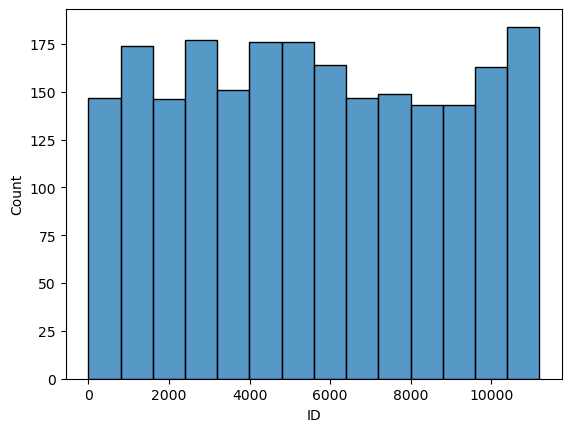

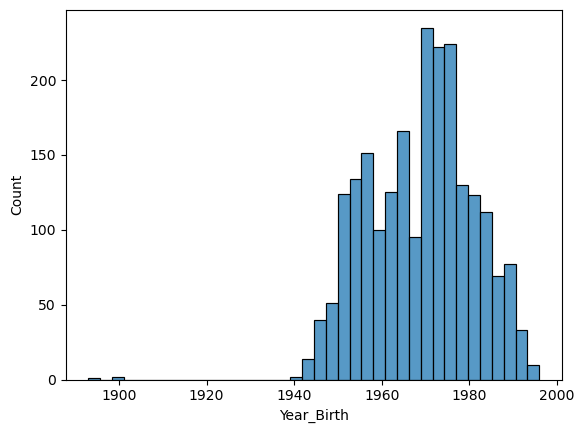

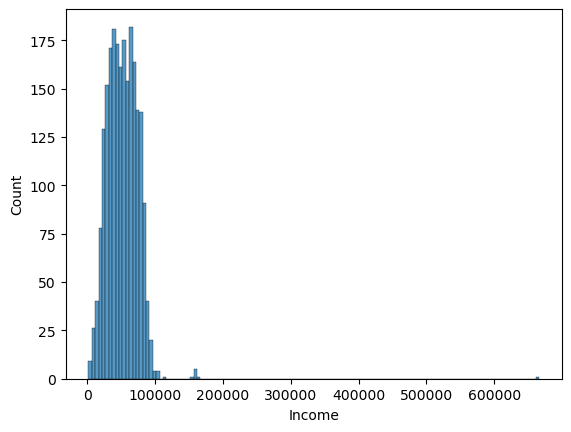

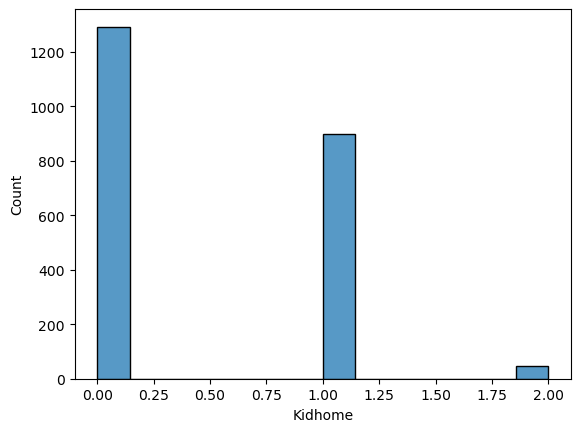

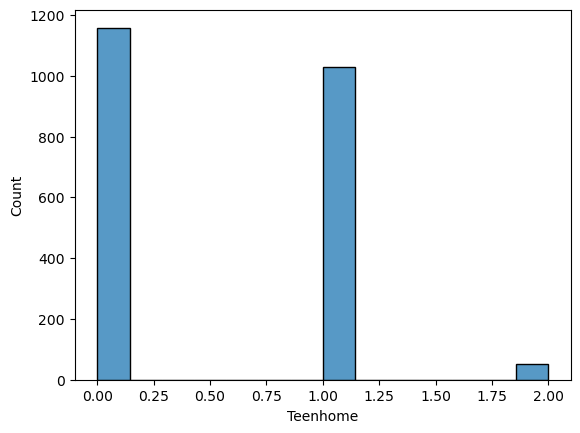

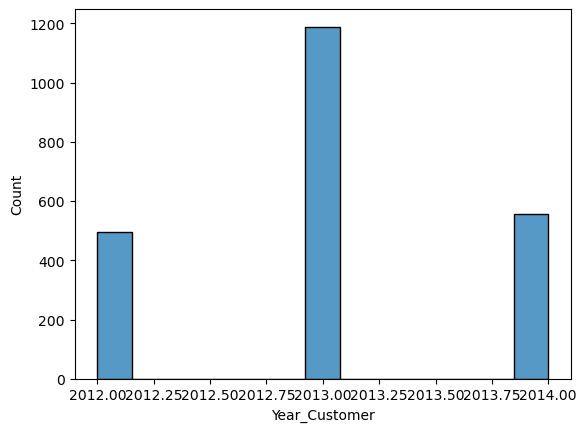

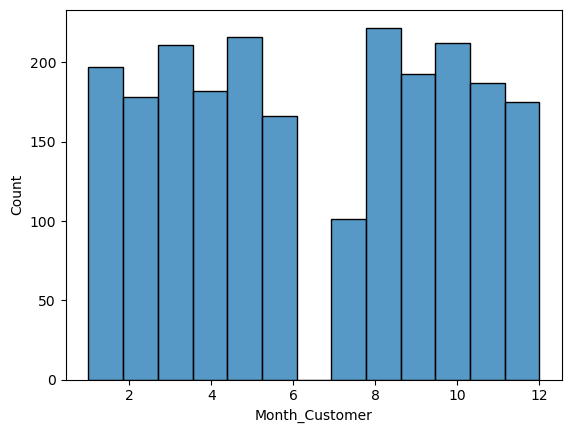

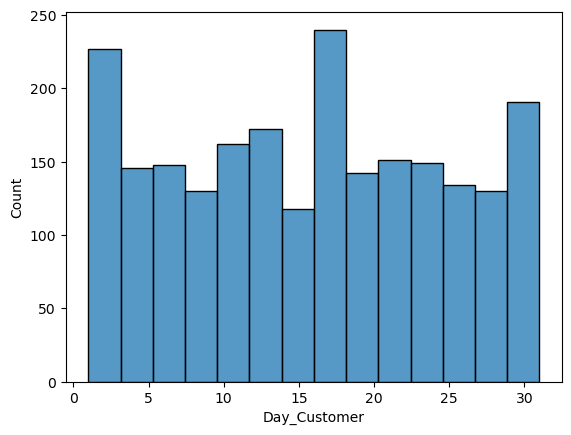

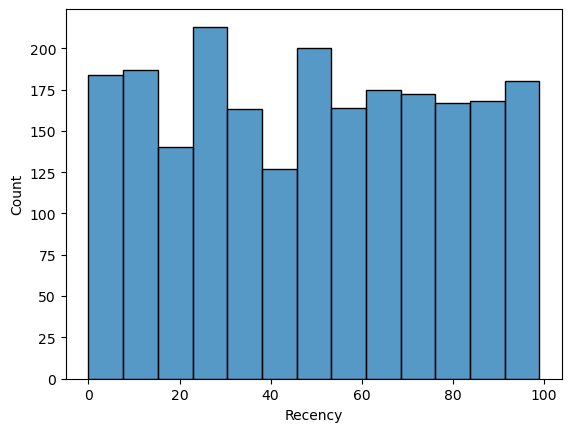

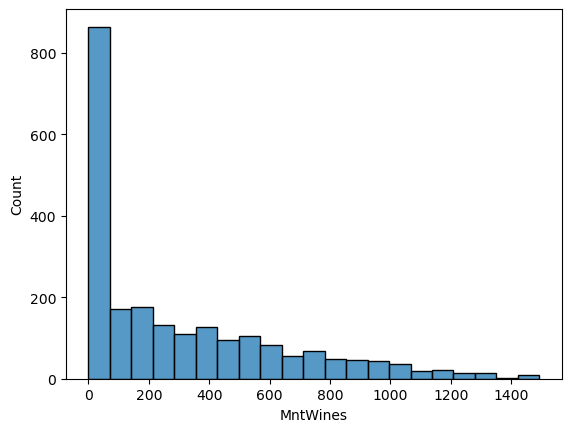

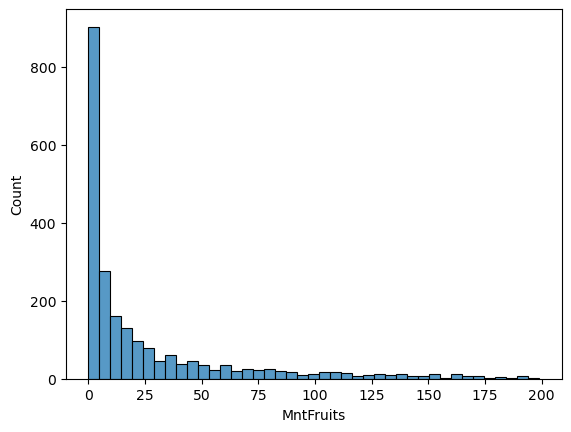

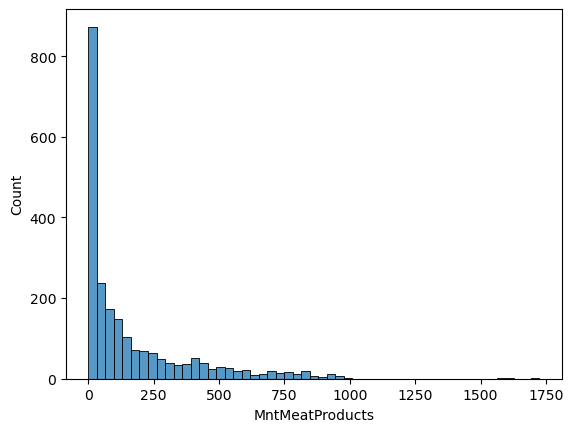

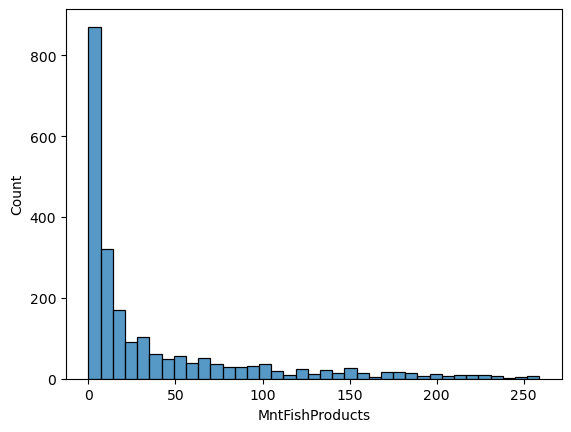

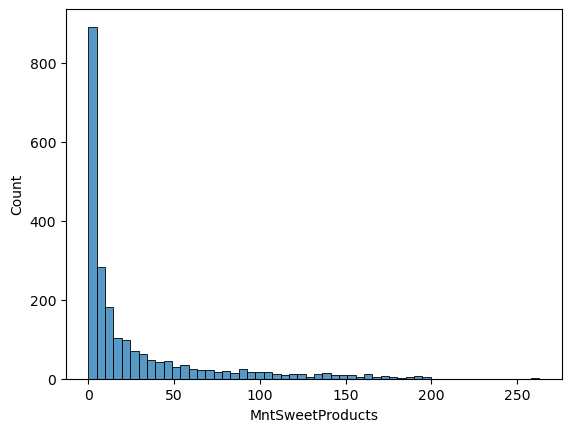

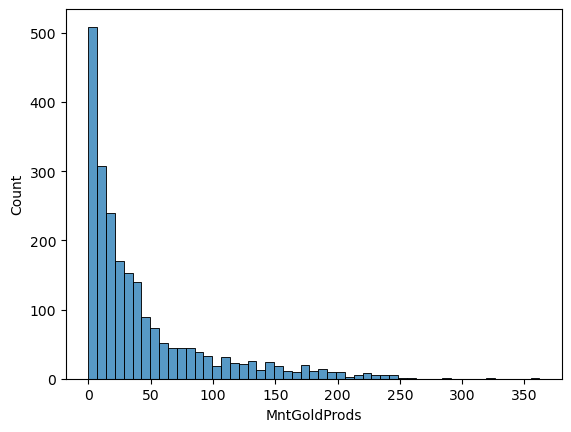

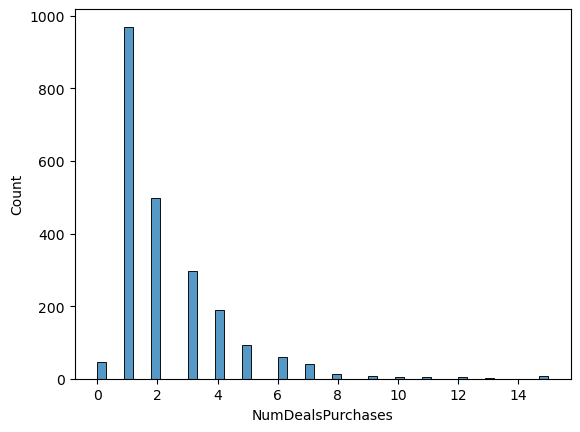

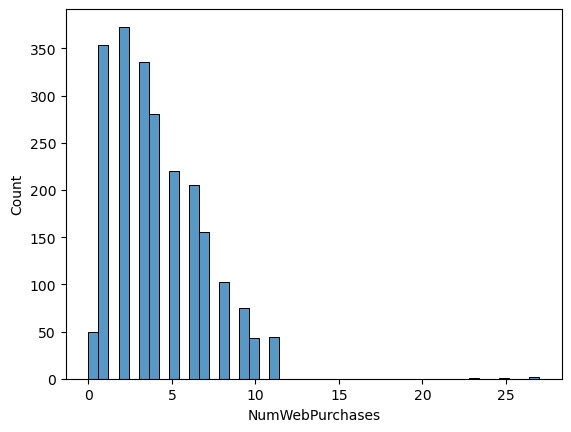

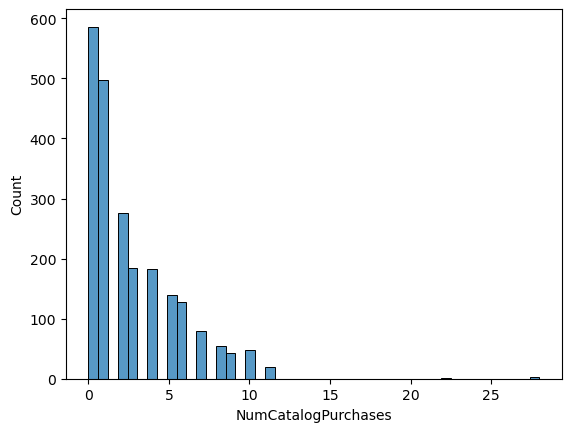

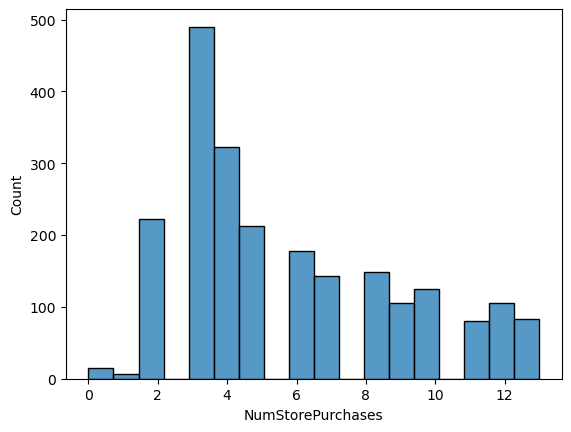

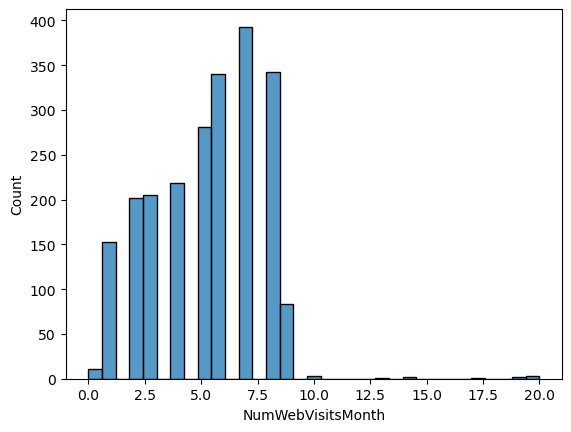

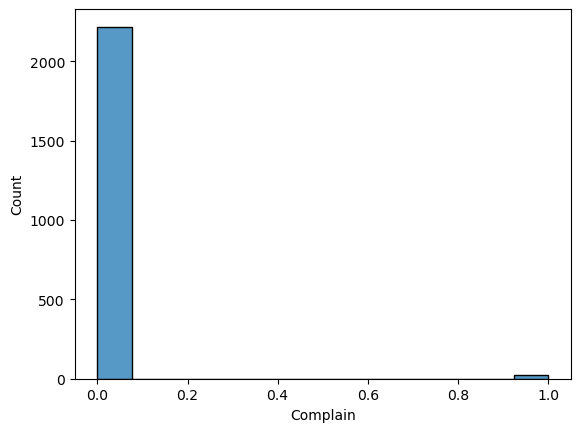

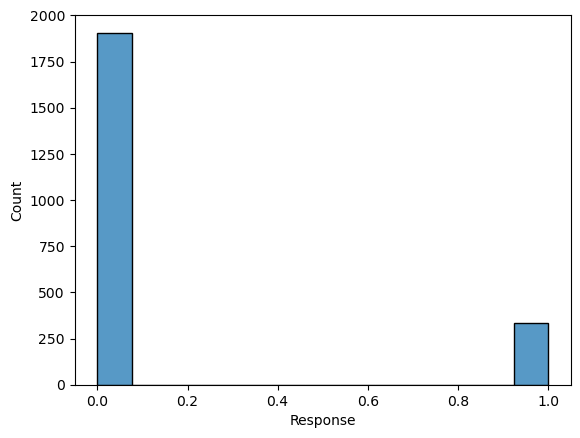

In [19]:
for i in dfr.select_dtypes(include="number").columns: #histogram of all numerical columns
    sns.histplot(data=dfr,x=i)
    plt.show()

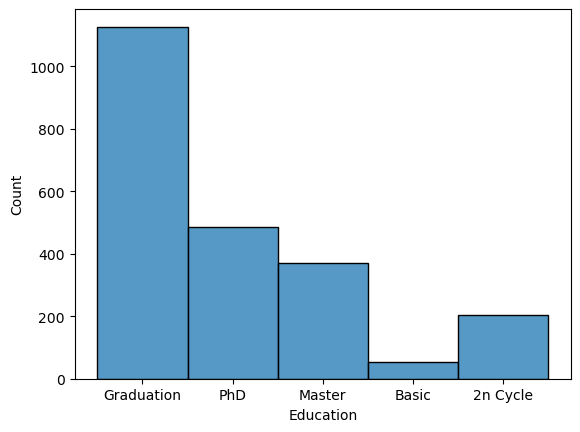

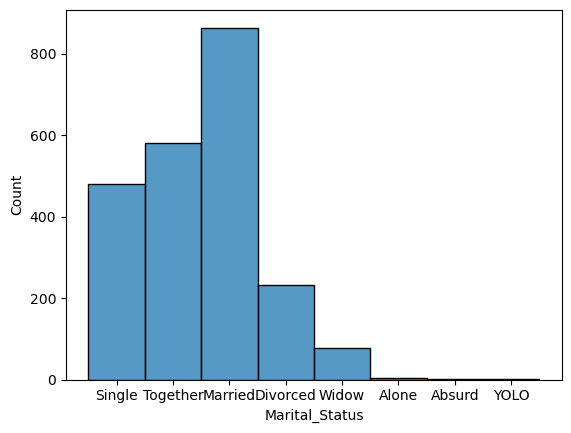

In [20]:
for i in dfr.select_dtypes(include="object").columns: #histogram of all numerical columns
    sns.histplot(data=dfr,x=i)
    plt.show()

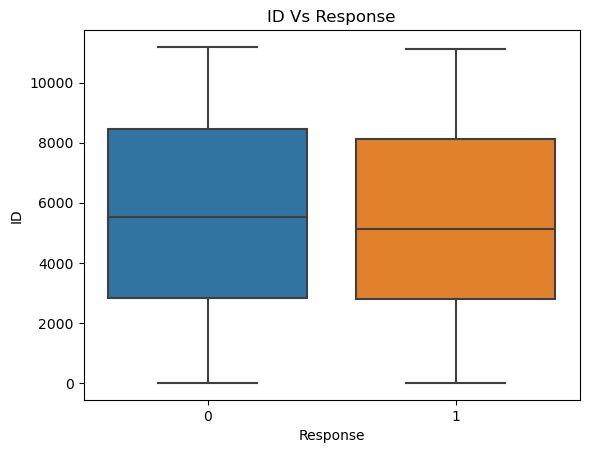

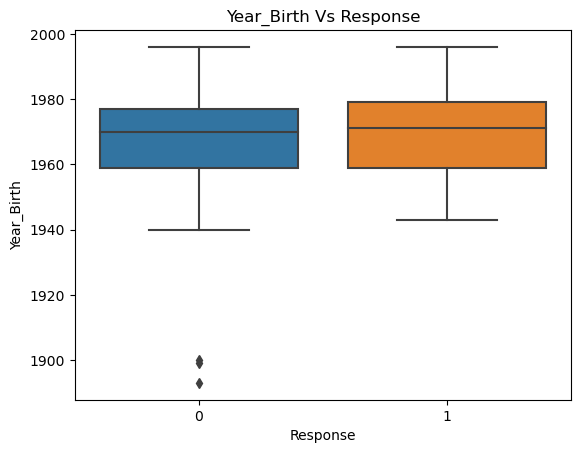

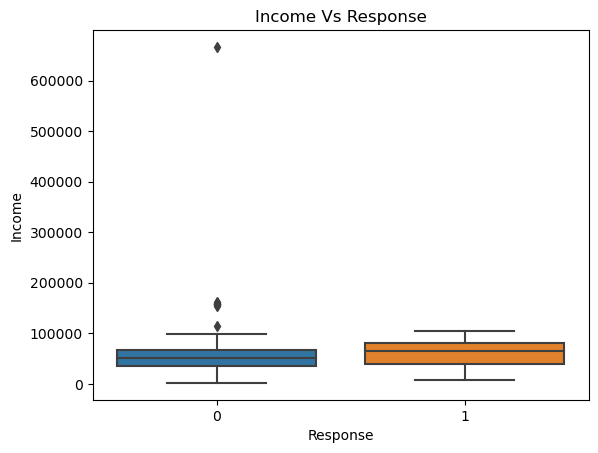

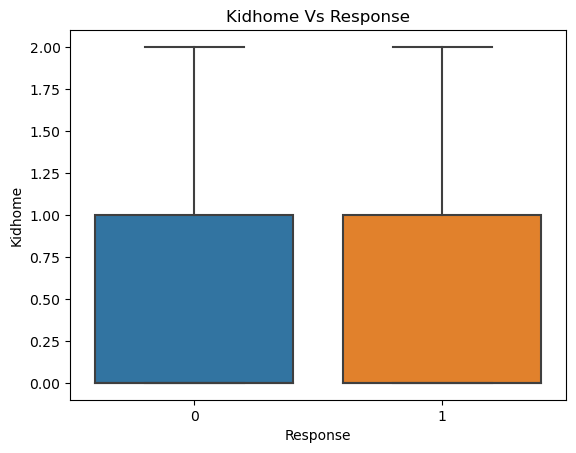

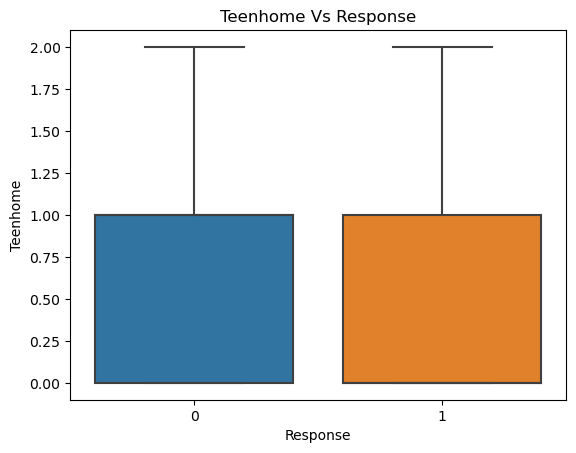

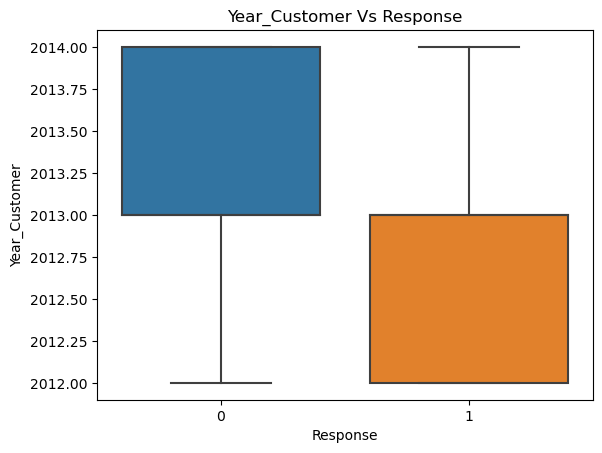

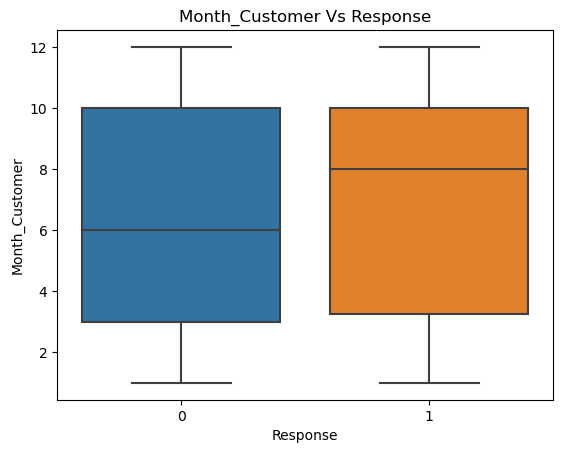

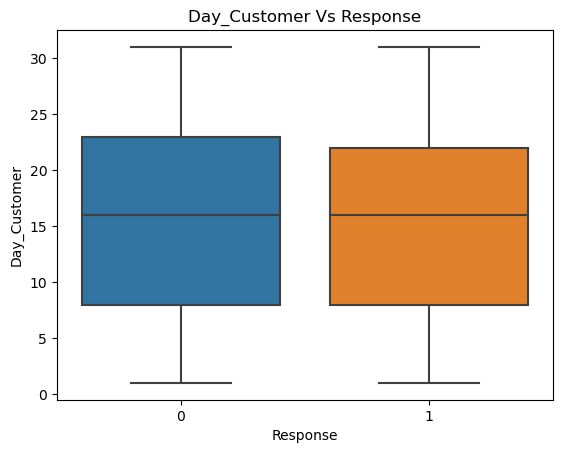

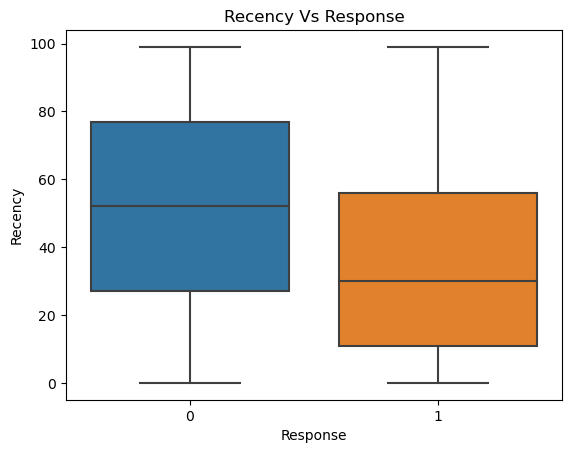

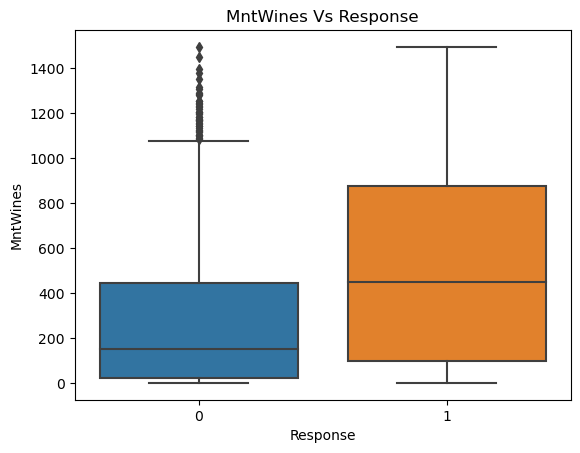

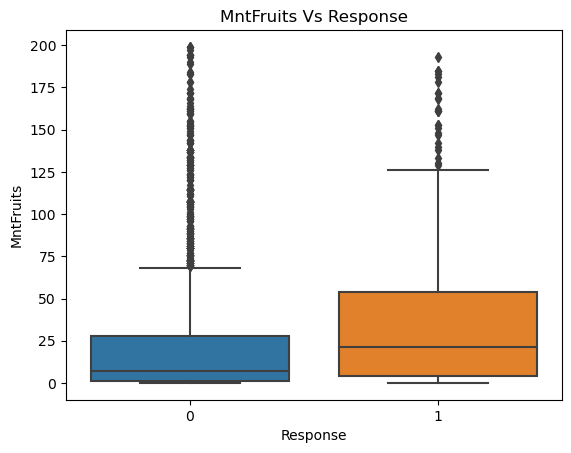

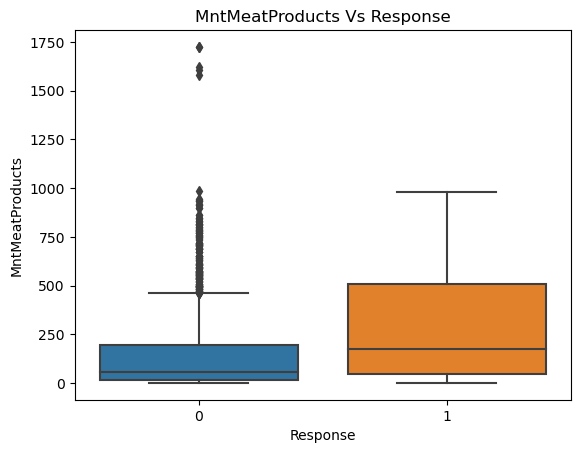

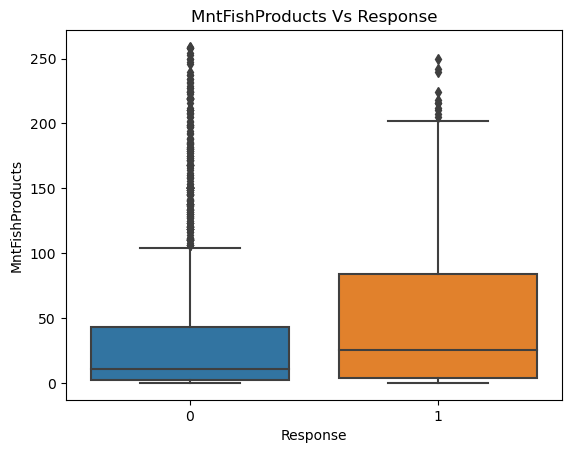

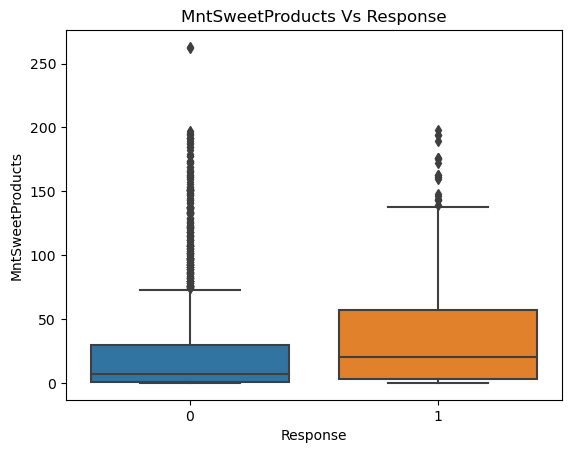

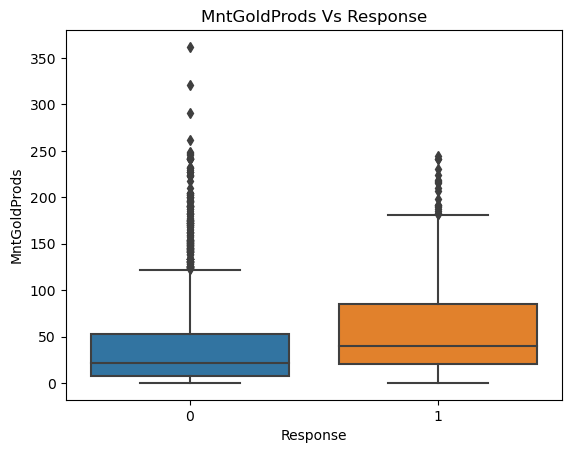

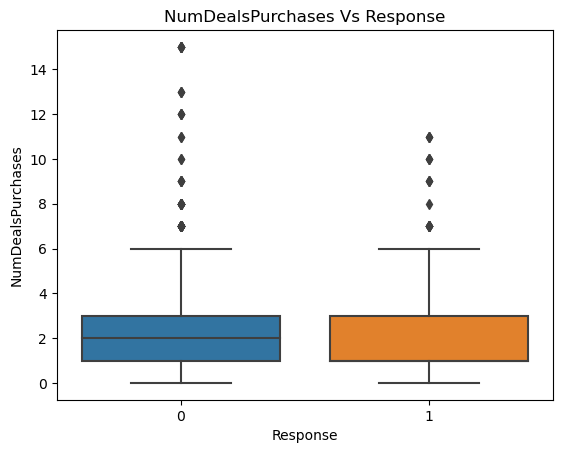

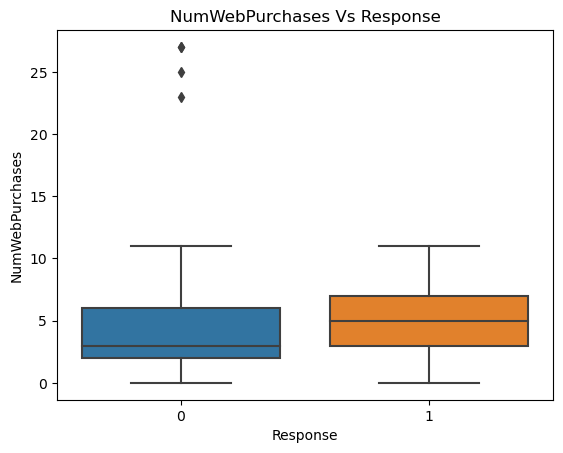

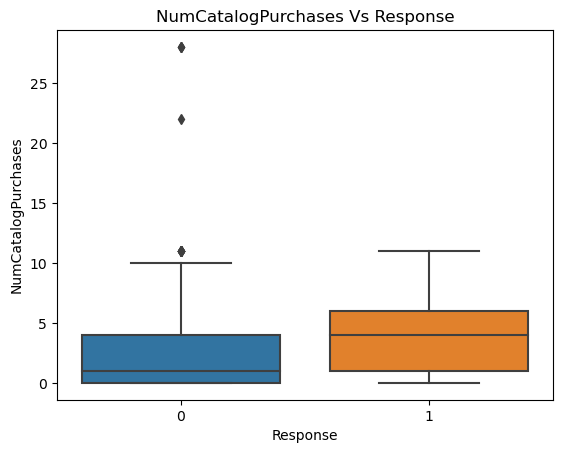

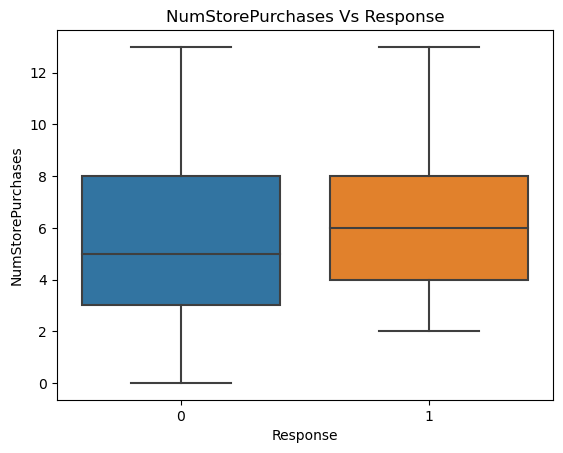

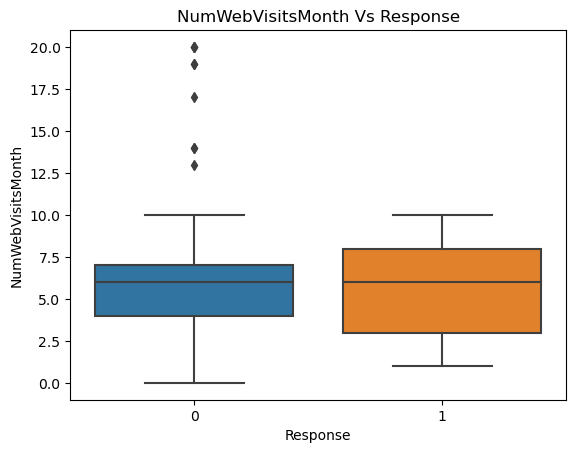

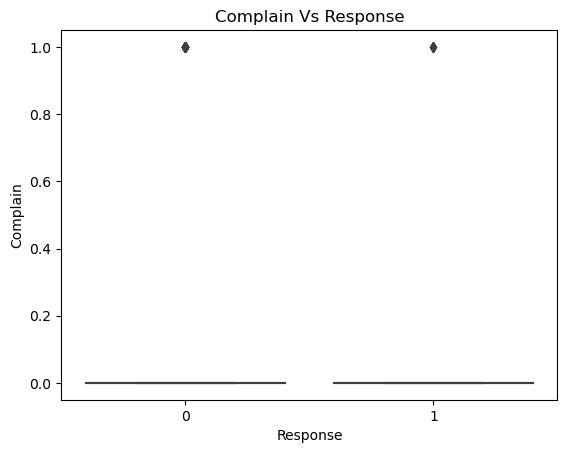

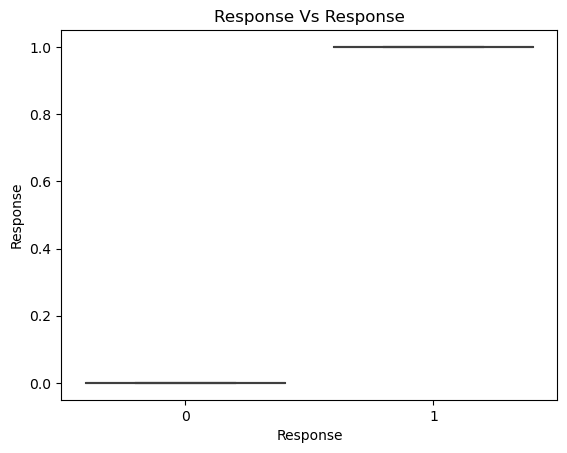

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dfr is your DataFrame
numerical_columns = dfr.select_dtypes(include='number').columns

for col in numerical_columns:
    sns.boxplot(data=dfr, x='Response', y=col)
    plt.title(f'{col} Vs Response')
    plt.show()


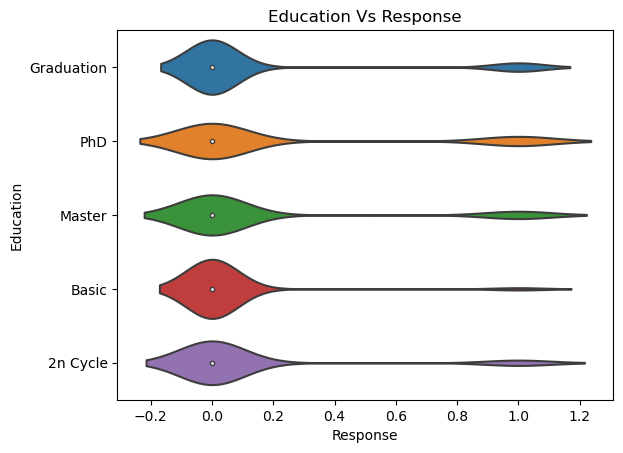

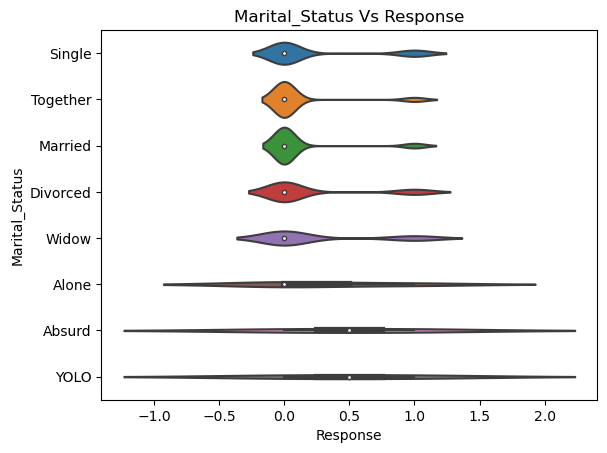

In [22]:
# Assuming dfr is your DataFrame
obj_columns = dfr.select_dtypes(include='object').columns

for col in obj_columns:
    sns.violinplot(data=dfr, x='Response', y=col)
    plt.title(f'{col} Vs Response')
    plt.show()

In [23]:
import pandas as pd

# Assuming df is your DataFrame
result = dfr['Kidhome'].equals(dfr['Teenhome'])

# Display the result
print(f"Kidhome and Teenhome are {'equal' if result else 'not equal'}.")


Kidhome and Teenhome are not equal.


In [24]:
#one hot encoding
dfr = pd.get_dummies(dfr, columns=['Education', 'Marital_Status'])
columns_to_drop = ['Marital_Status_Together','Education_2n Cycle']
dfr = dfr.drop(columns=columns_to_drop, axis=1)


In [25]:
bl = dfr.select_dtypes(include='boolean').columns
dfr[bl] = dfr[bl].astype(int)
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   float64
 1   Year_Birth               2240 non-null   float64
 2   Income                   2240 non-null   float64
 3   Kidhome                  2240 non-null   float64
 4   Teenhome                 2240 non-null   float64
 5   Year_Customer            2240 non-null   int32  
 6   Month_Customer           2240 non-null   int32  
 7   Day_Customer             2240 non-null   int32  
 8   Recency                  2240 non-null   float64
 9   MntWines                 2240 non-null   float64
 10  MntFruits                2240 non-null   float64
 11  MntMeatProducts          2240 non-null   float64
 12  MntFishProducts          2240 non-null   float64
 13  MntSweetProducts         2240 non-null   float64
 14  MntGoldProds            

In [26]:
dfr.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Year_Customer',
       'Month_Customer', 'Day_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [27]:



hmp1 = dfr.corr()

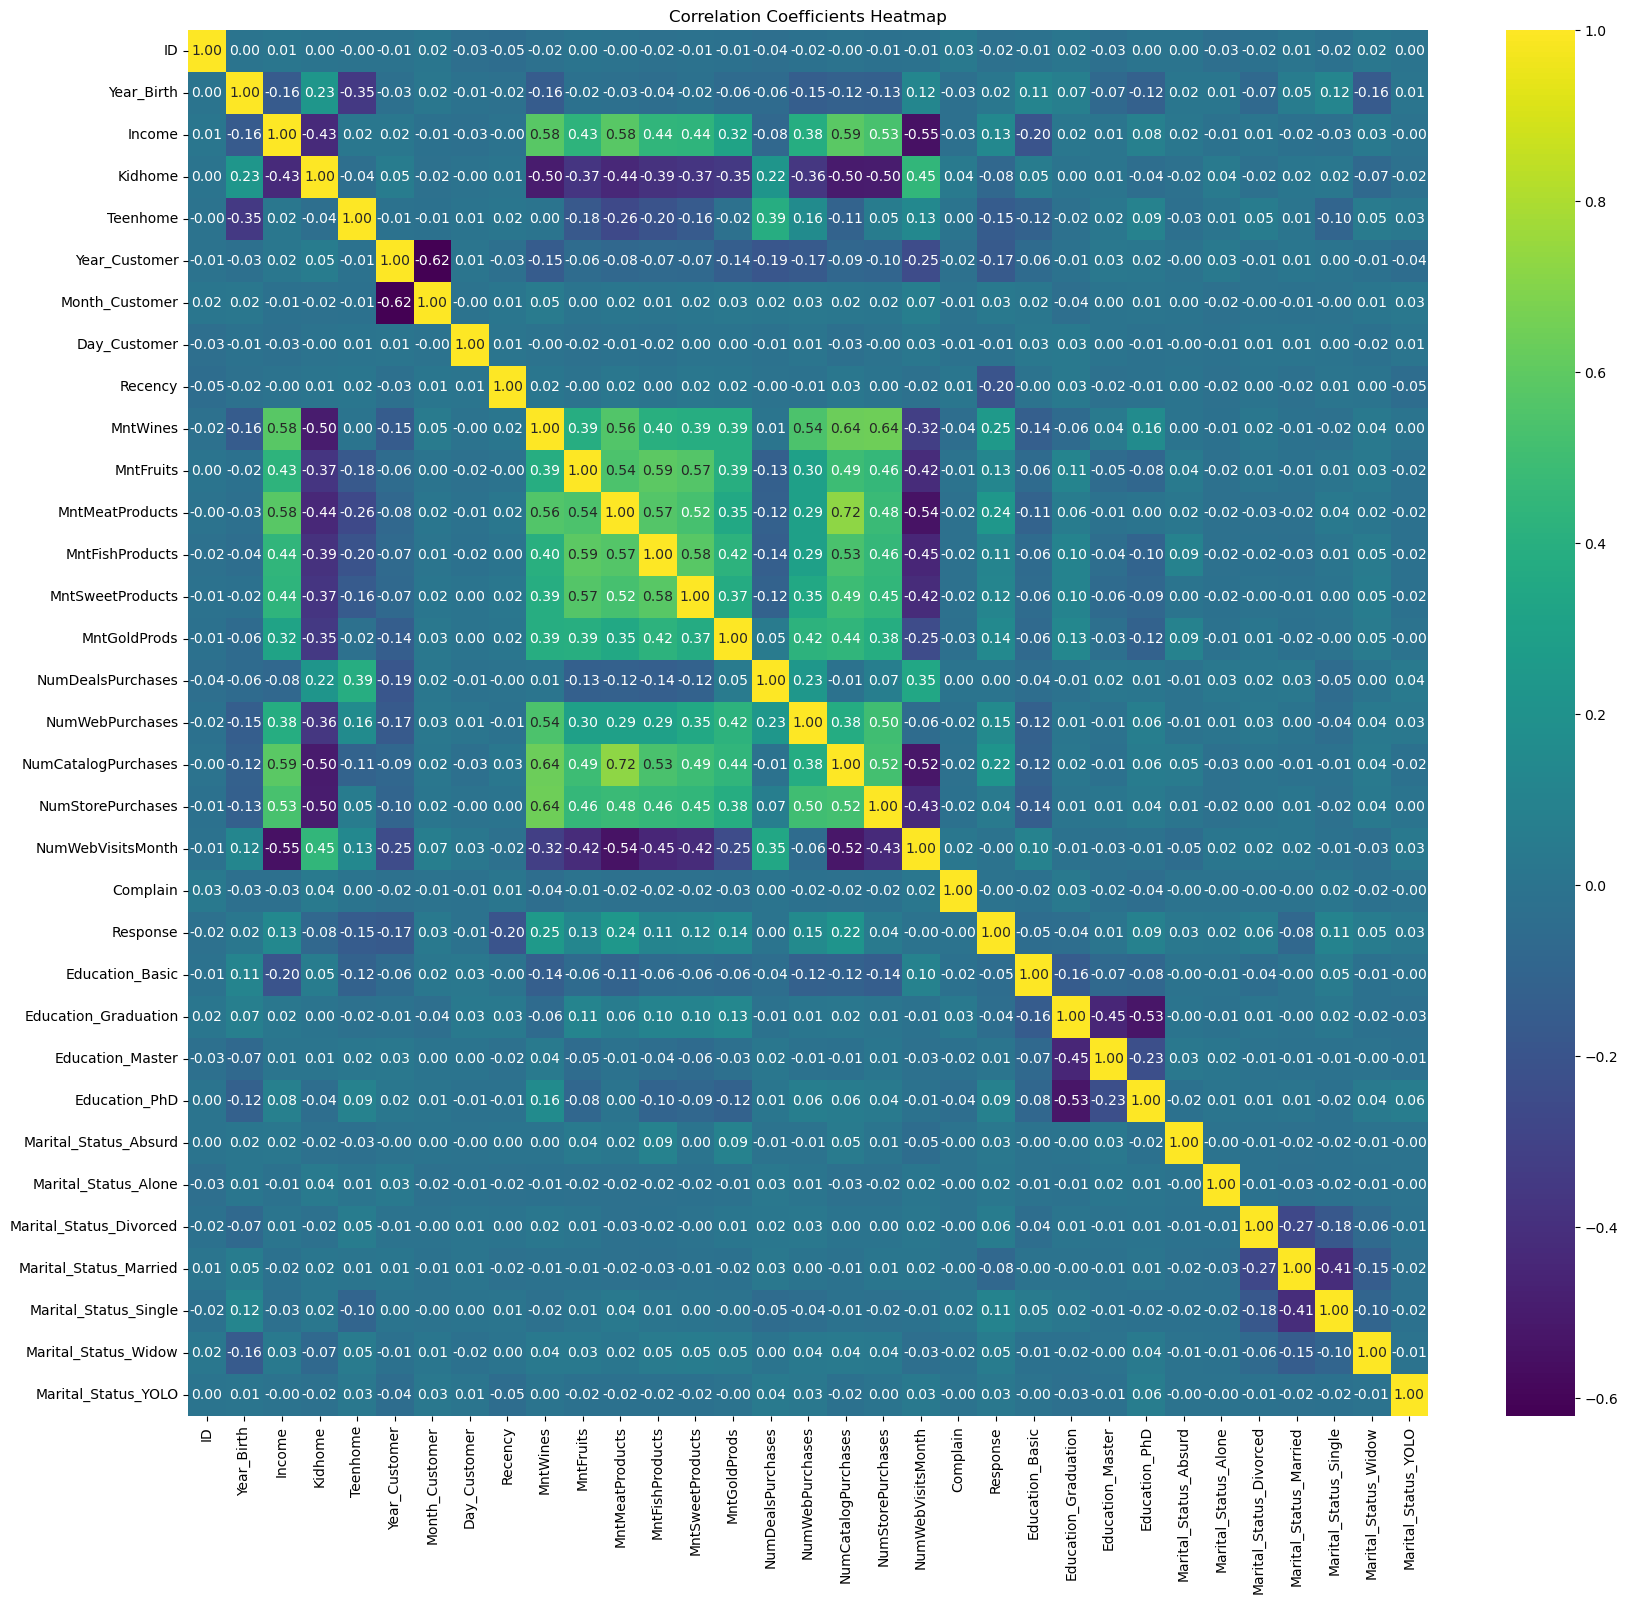

In [28]:
plt.figure(figsize=(20, 18))  # Adjust the size as needed
sns.heatmap(hmp1, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Coefficients Heatmap')
plt.show()

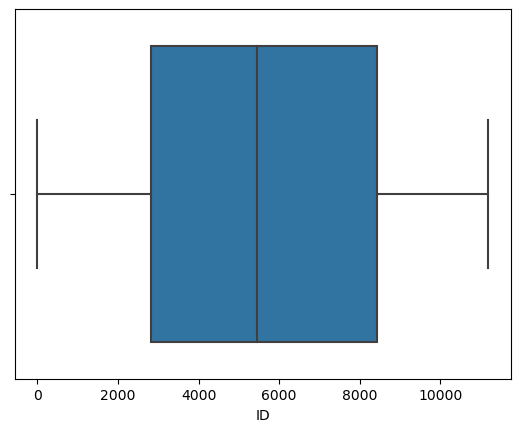

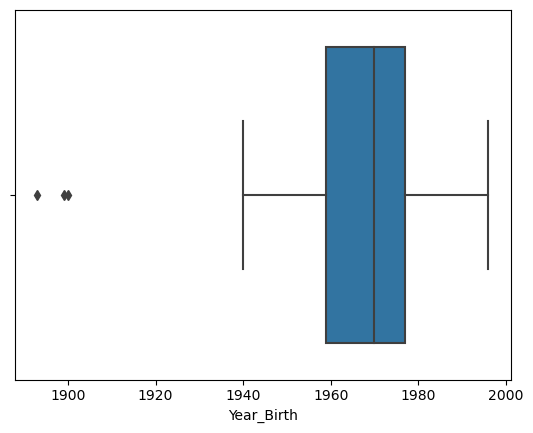

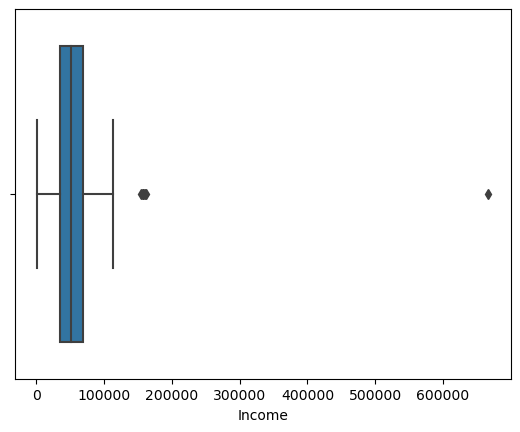

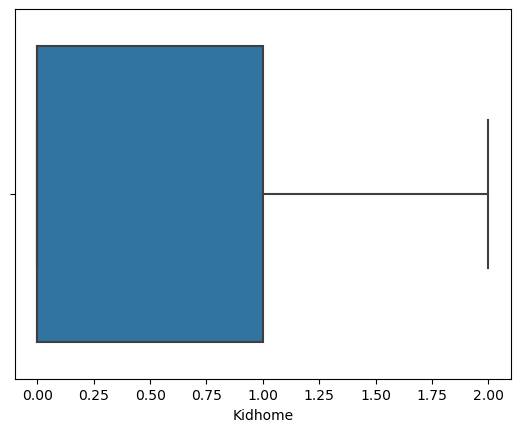

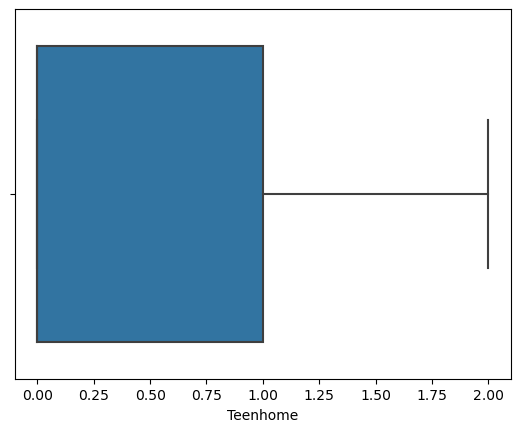

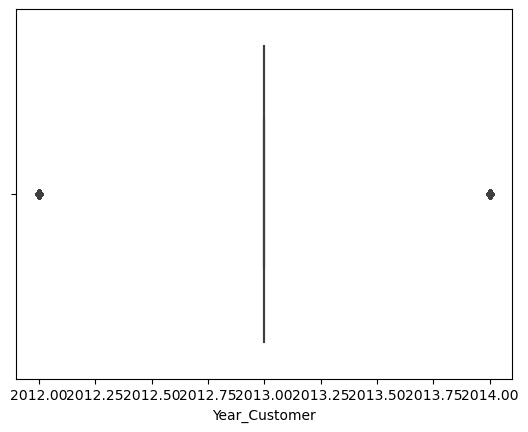

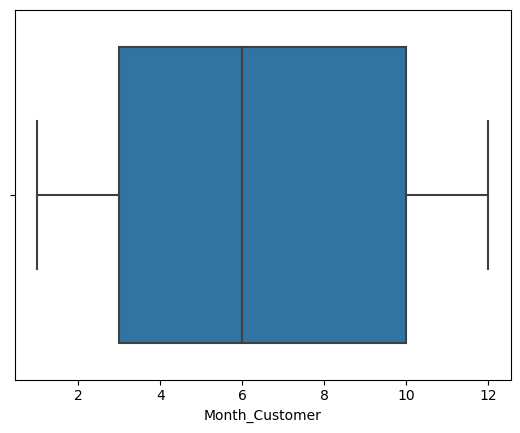

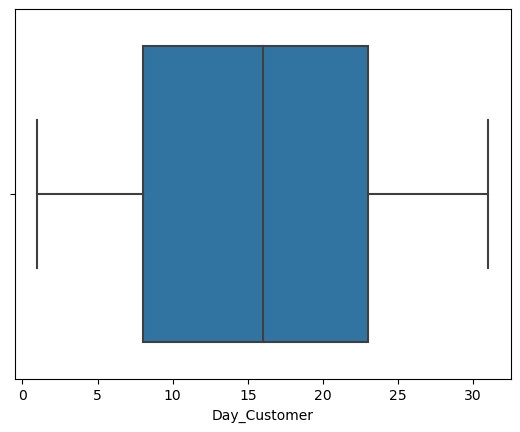

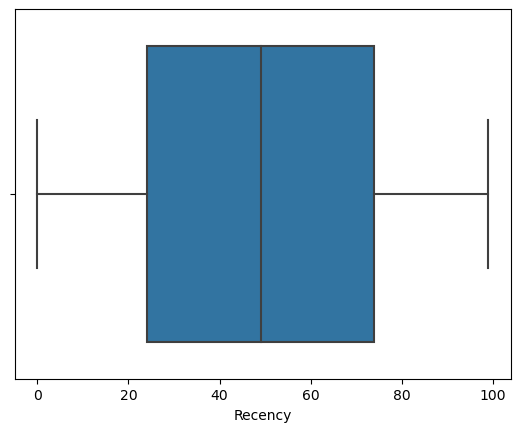

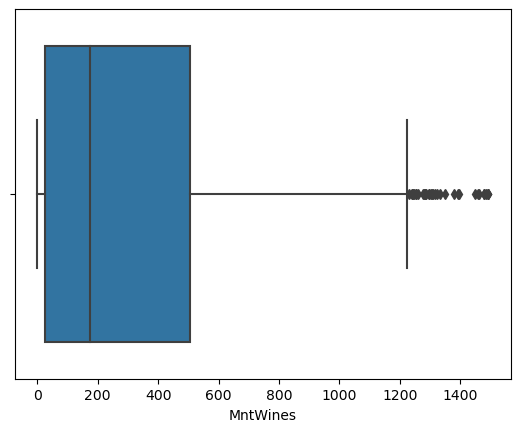

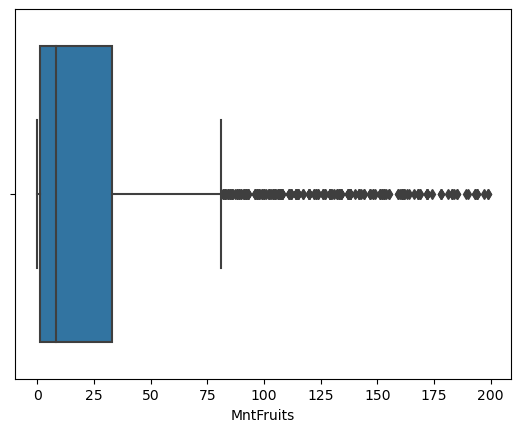

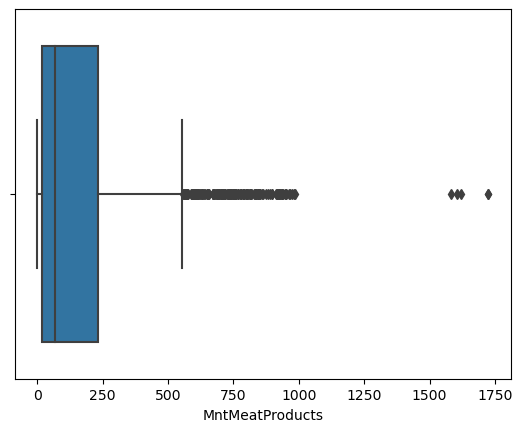

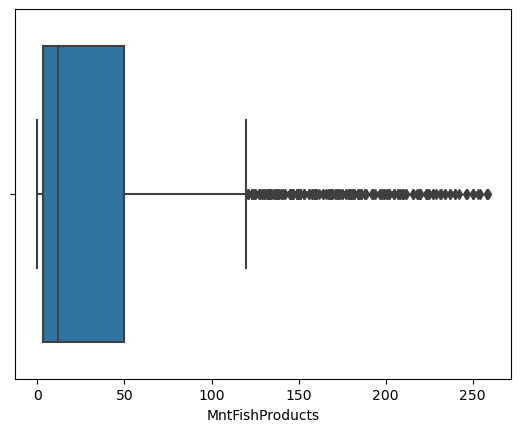

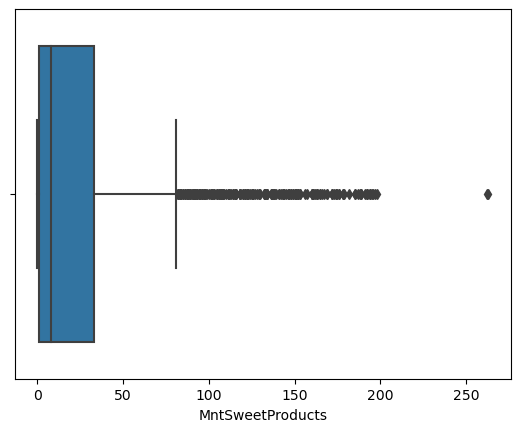

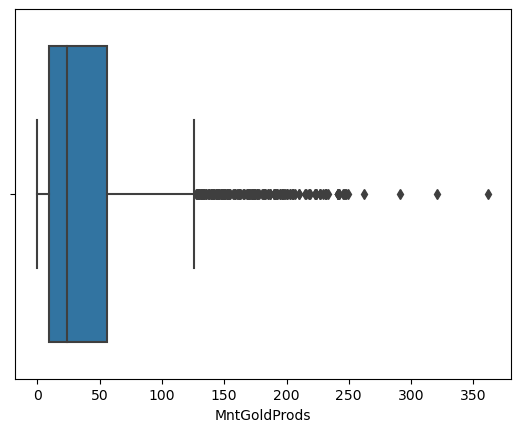

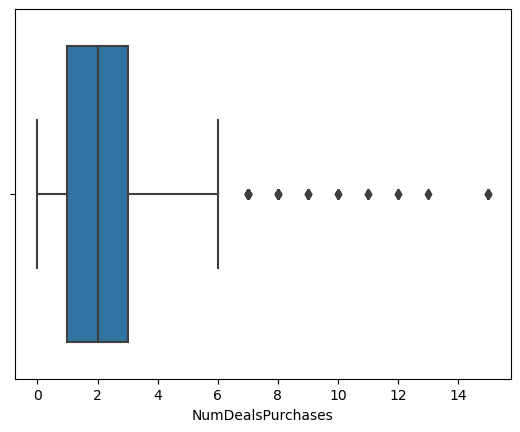

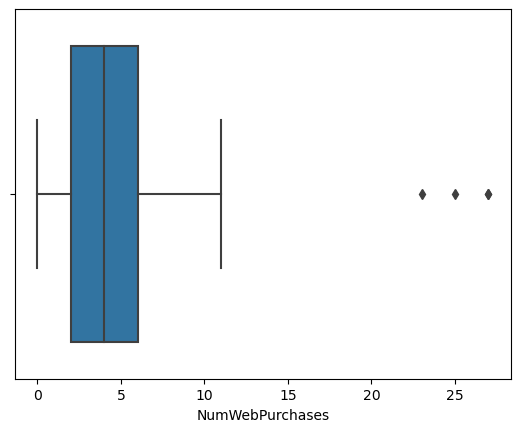

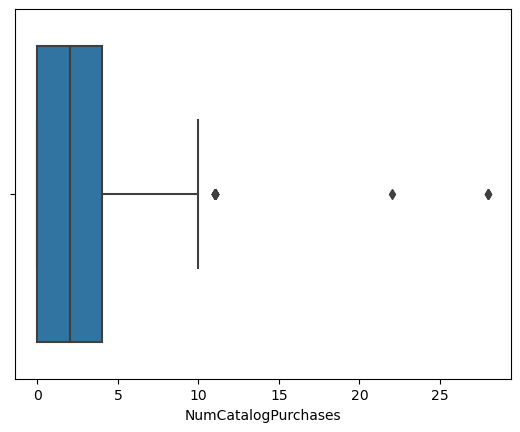

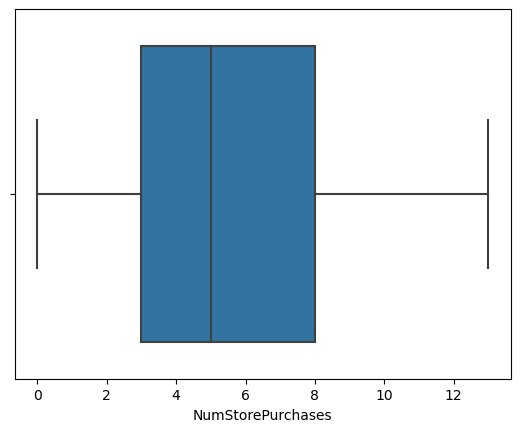

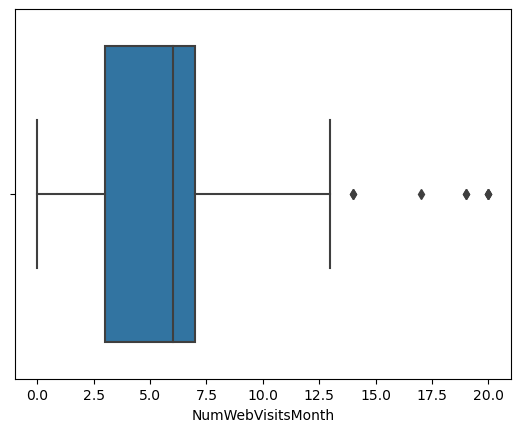

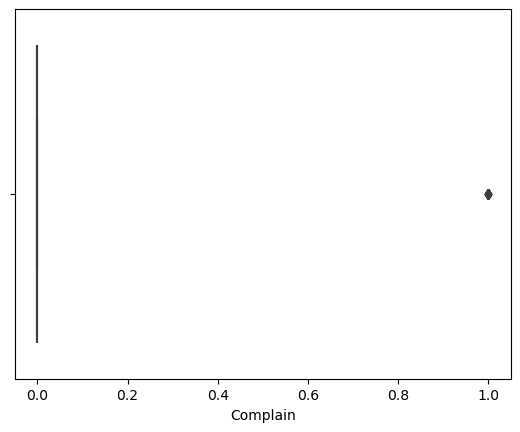

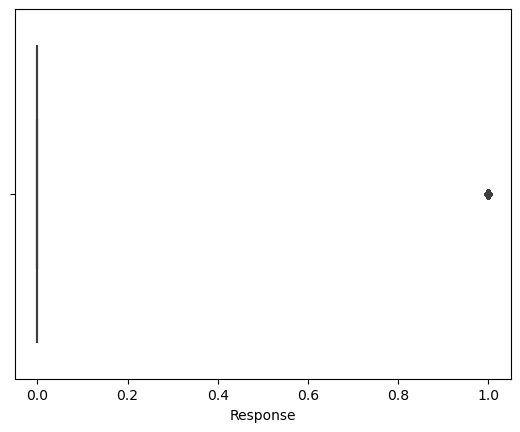

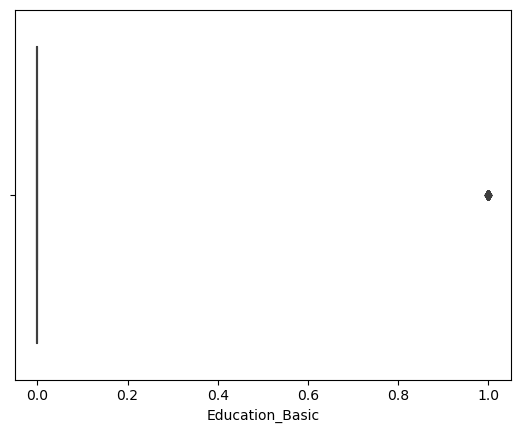

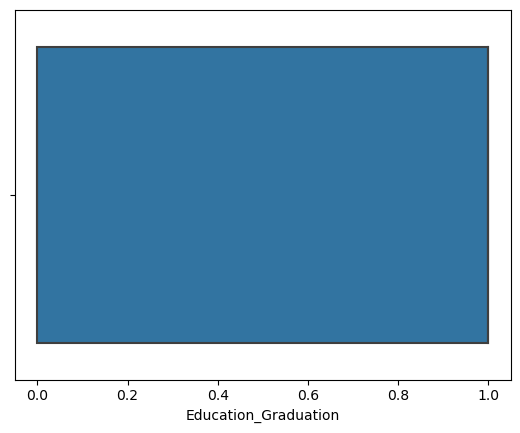

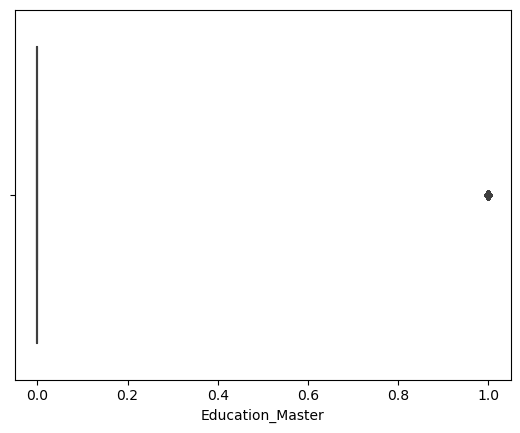

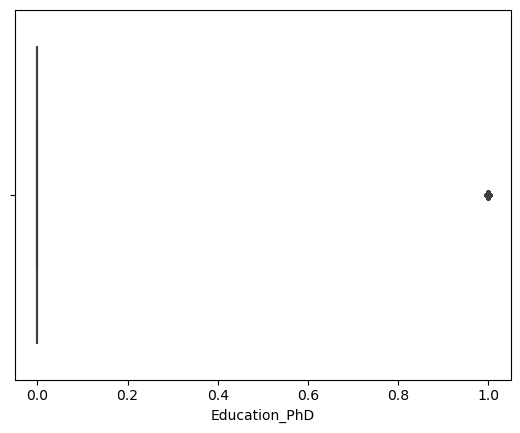

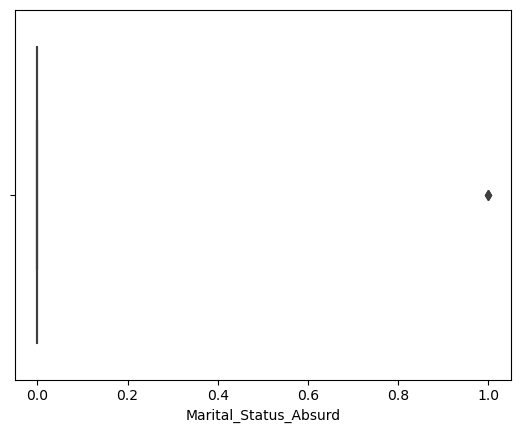

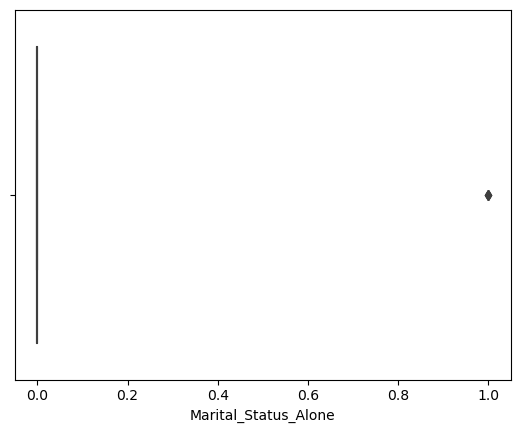

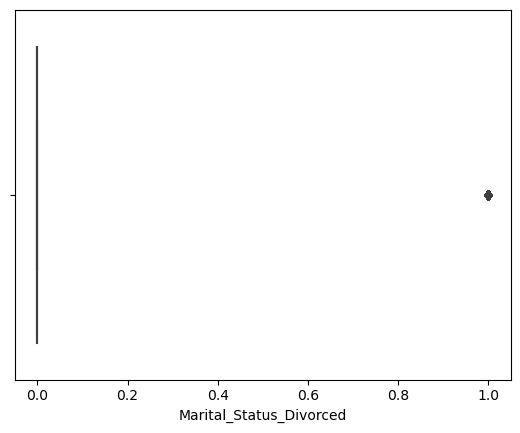

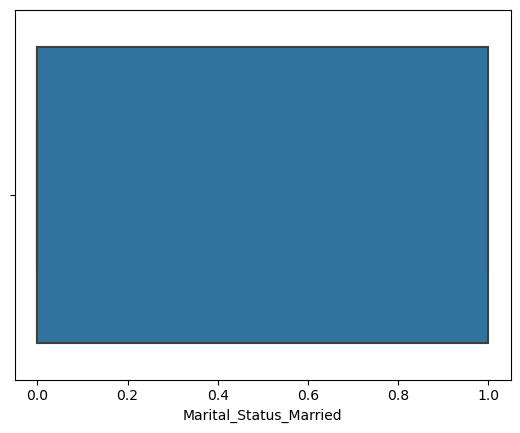

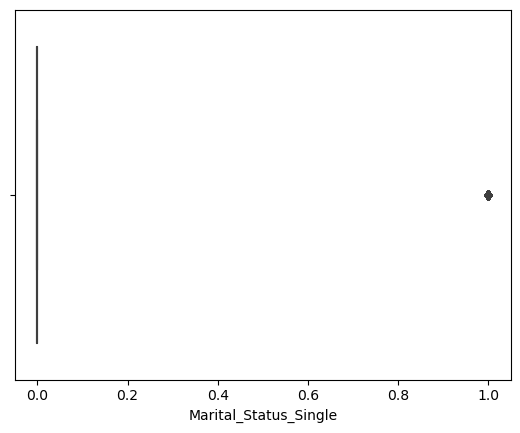

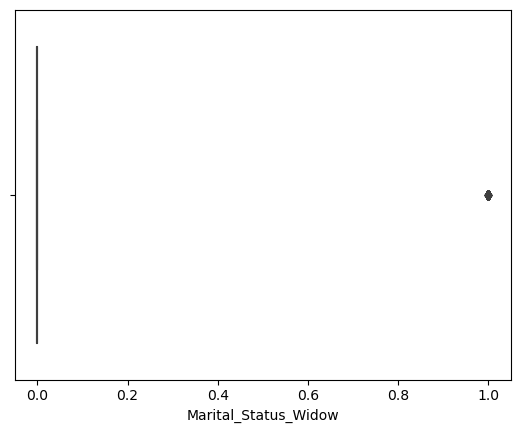

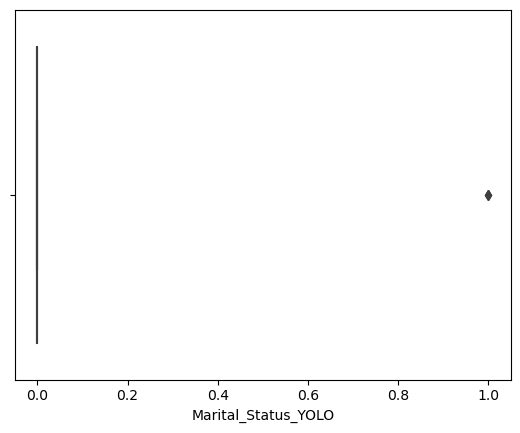

In [29]:
for i in dfr.select_dtypes(include="number").columns: #histogram of all numerical columns
    sns.boxplot(data=dfr,x=i)
    plt.show()

In [30]:
dfr.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Year_Customer',
       'Month_Customer', 'Day_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [31]:
def remove_outliers_iqr(data, columns, threshold=0.9):
    updated_data = data.copy()  # Create a copy to avoid modifying the original DataFrame
    
    for column in columns:
        Q1 = updated_data[column].quantile(0.25)
        Q3 = updated_data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds to filter outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter outliers and update the DataFrame
        updated_data = updated_data[(updated_data[column] >= lower_bound) & (updated_data[column] <= upper_bound)]

    return updated_data

# Extract numerical columns (replace 'numerical_columns' with your actual numerical column names)
numerical_columns = ['Year_Birth', 'Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases']
# Apply the function to remove outliers from the DataFrame
dfr = remove_outliers_iqr(dfr, columns=numerical_columns)


In [32]:
dfr

,ID,Year_Birth,Income,Kidhome,Teenhome,Year_Customer,Month_Customer,Day_Customer,Recency,MntWines,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Marital_Status_YOLO
1,2174.0,1954.0,46344.000000,1.0,1.0,2014,3,8,38.0,11.0,...,1,0,0,0,0,0,0,1,0,0
3,6182.0,1984.0,26646.000000,1.0,0.0,2014,2,10,26.0,11.0,...,1,0,0,0,0,0,0,0,0,0
7,6177.0,1985.0,33454.000000,1.0,0.0,2013,5,8,32.0,76.0,...,0,0,1,0,0,0,1,0,0,0
8,4855.0,1974.0,30351.000000,1.0,0.0,2013,6,6,19.0,14.0,...,0,0,1,0,0,0,0,0,0,0
10,1994.0,1983.0,52247.251354,1.0,0.0,2013,11,15,11.0,5.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,10084.0,1972.0,24434.000000,2.0,0.0,2014,5,18,9.0,3.0,...,1,0,0,0,0,0,1,0,0,0
2230,7004.0,1984.0,11012.000000,1.0,0.0,2013,3,16,82.0,24.0,...,1,0,0,0,0,0,0,1,0,0
2232,8080.0,1986.0,26816.000000,0.0,0.0,2012,8,17,50.0,5.0,...,1,0,0,0,0,0,0,1,0,0
2234,8372.0,1974.0,34421.000000,1.0,0.0,2013,7,1,81.0,3.0,...,1,0,0,0,0,0,1,0,0,0


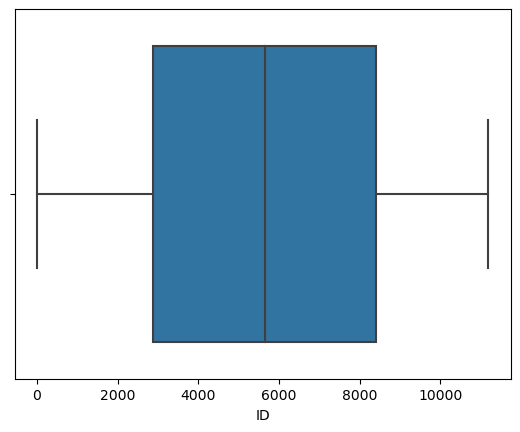

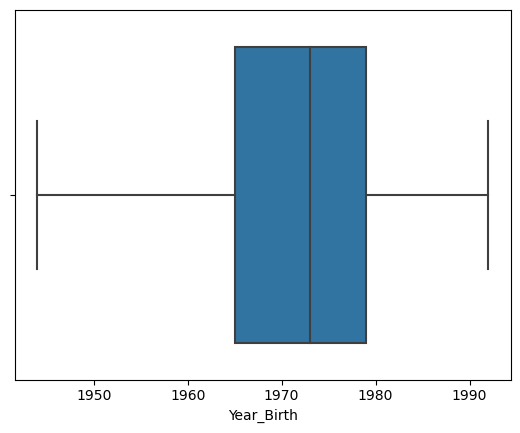

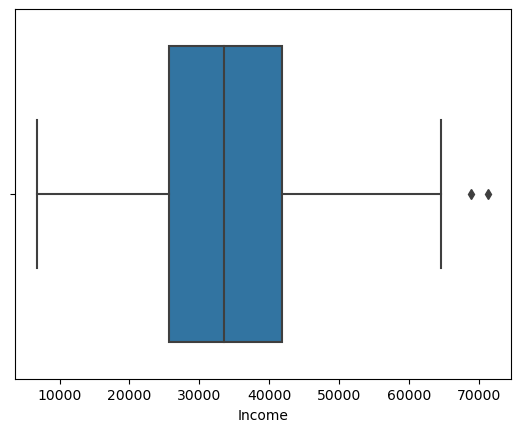

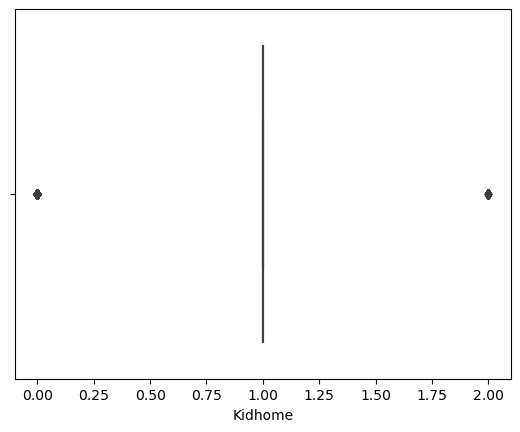

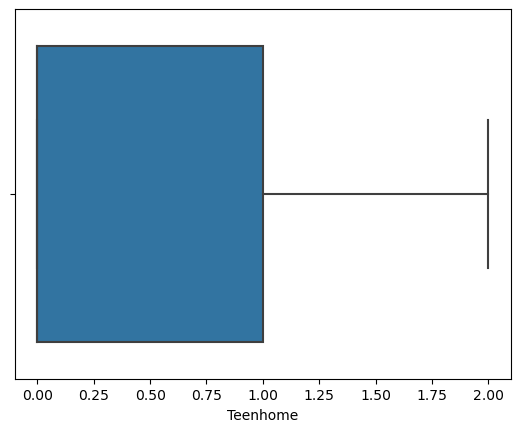

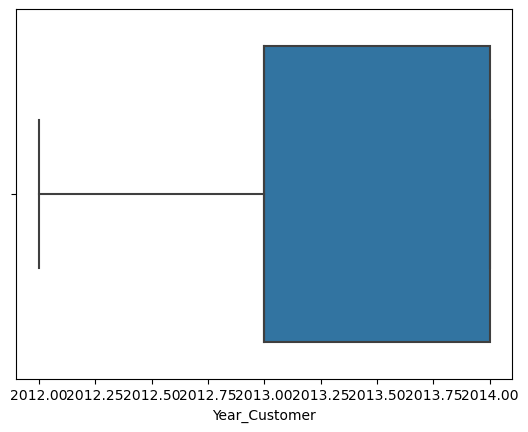

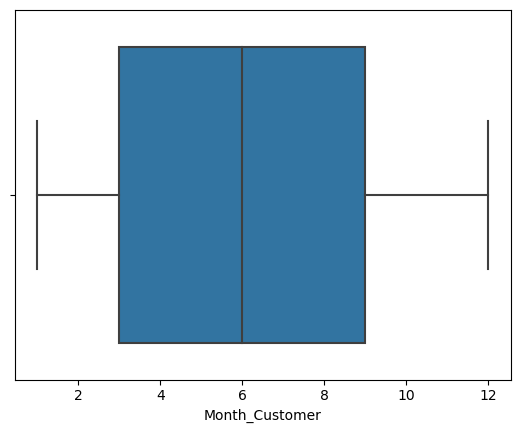

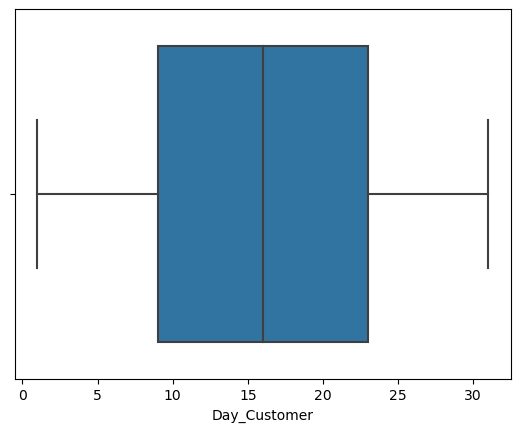

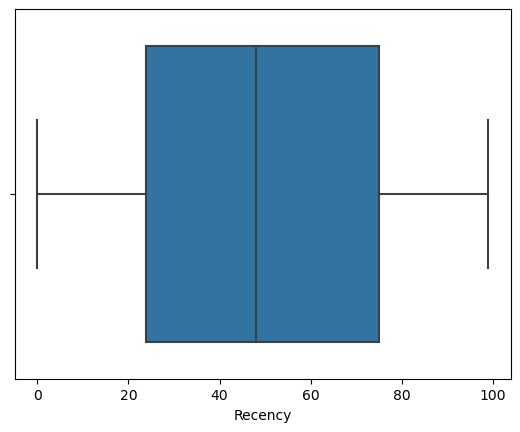

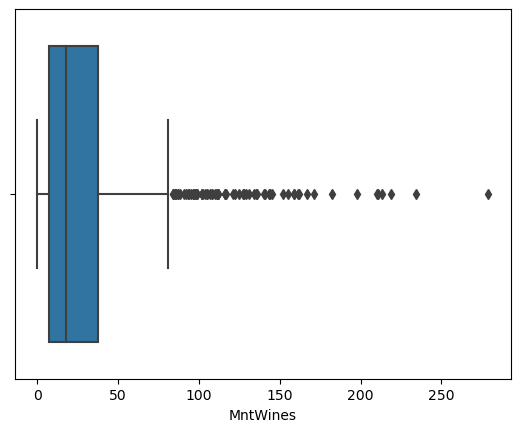

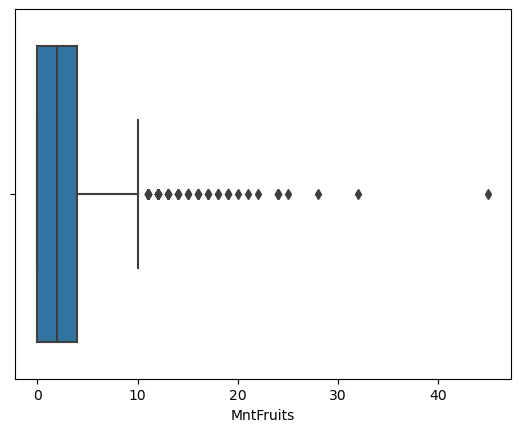

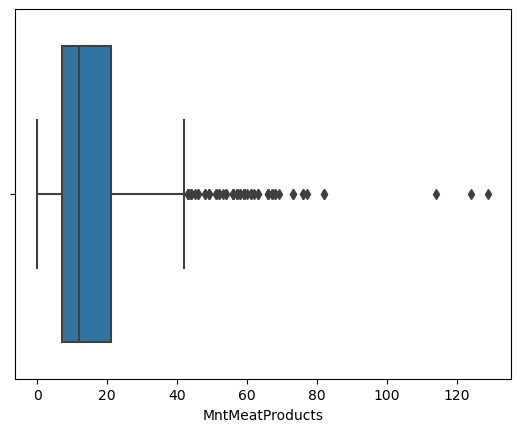

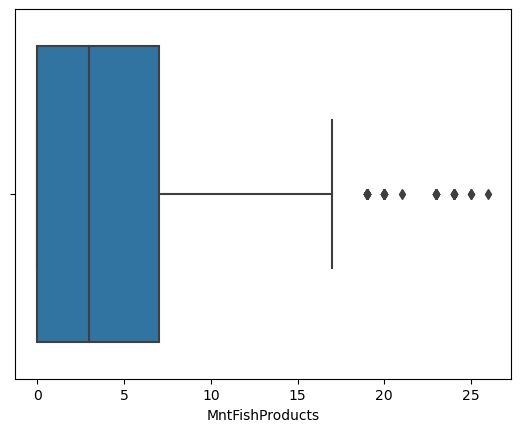

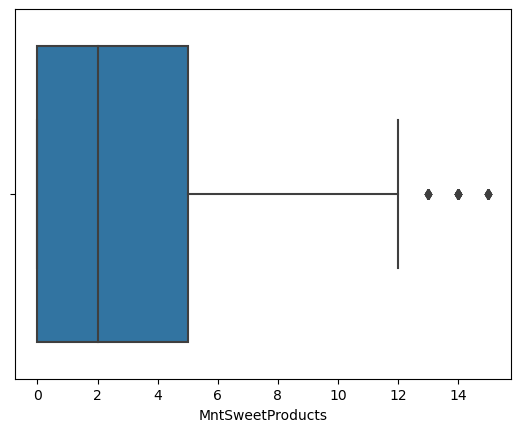

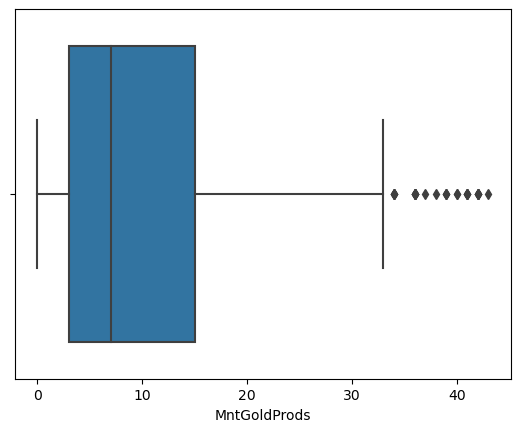

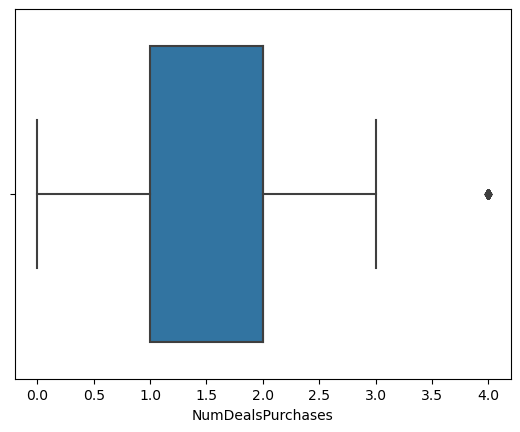

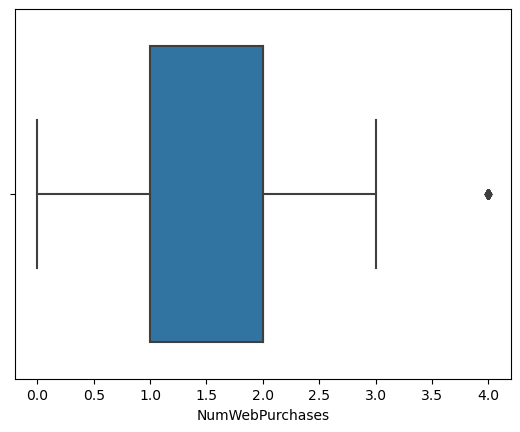

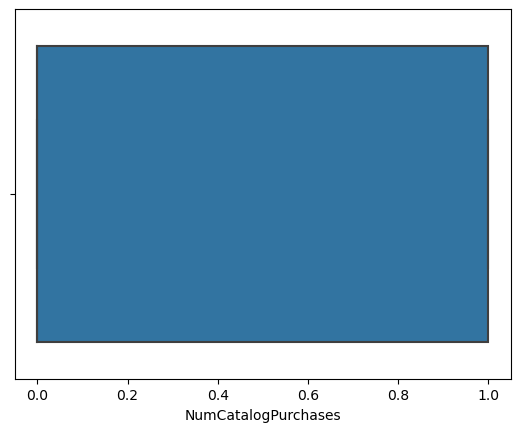

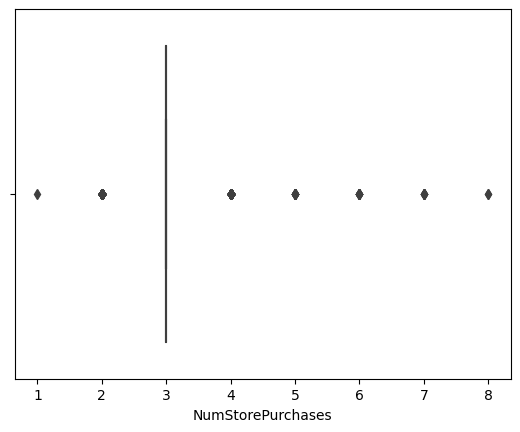

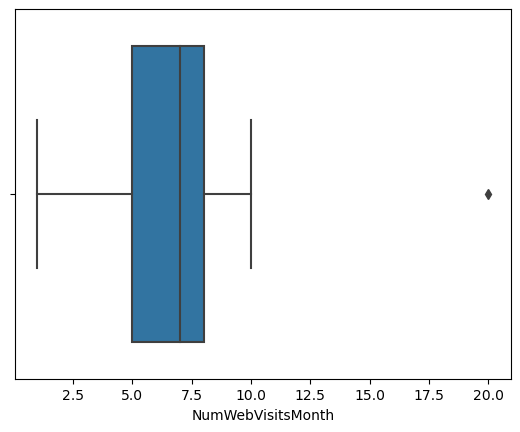

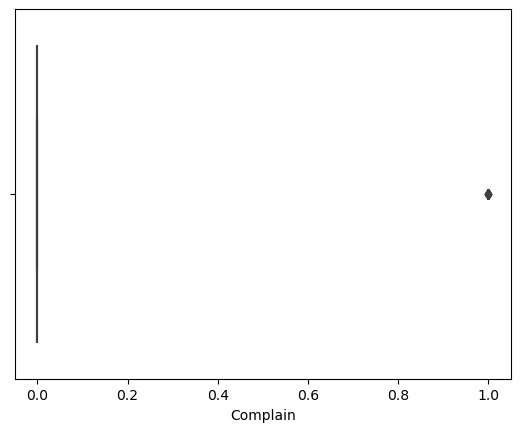

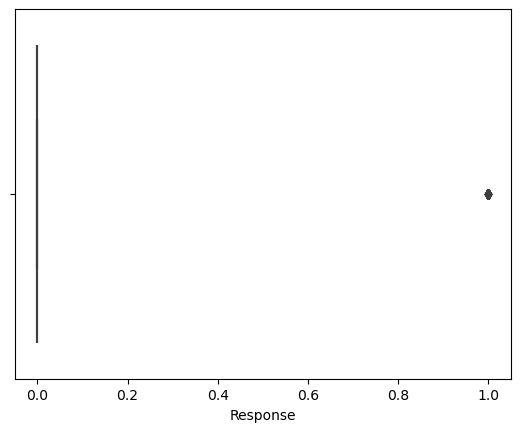

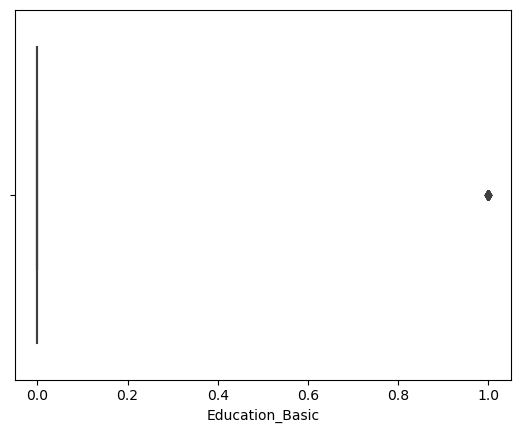

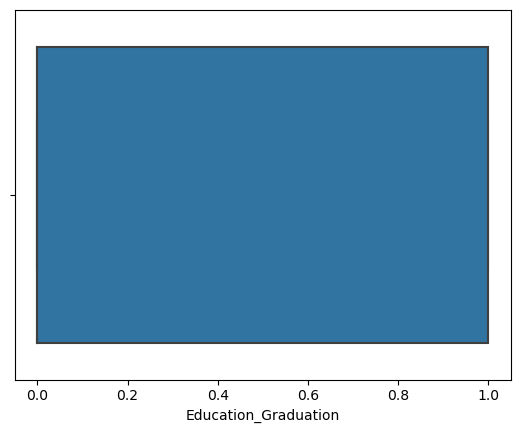

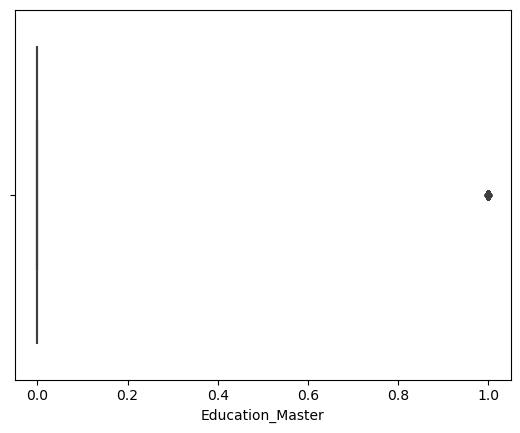

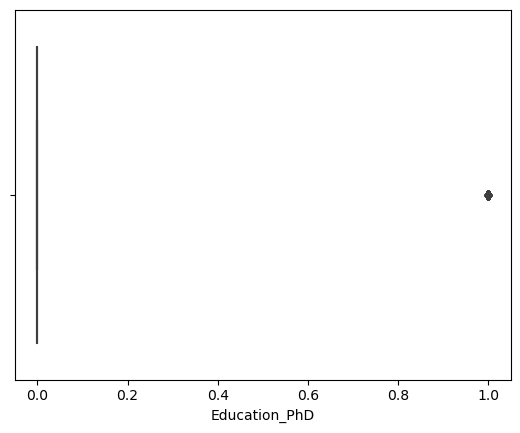

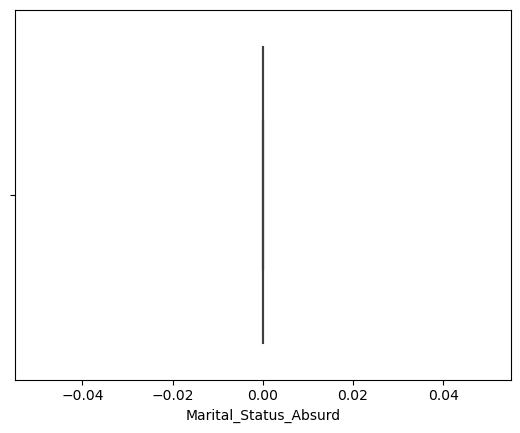

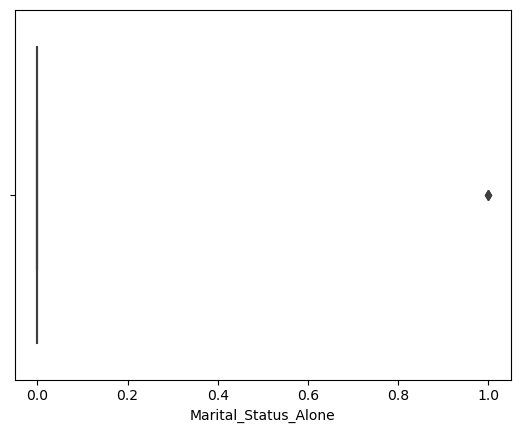

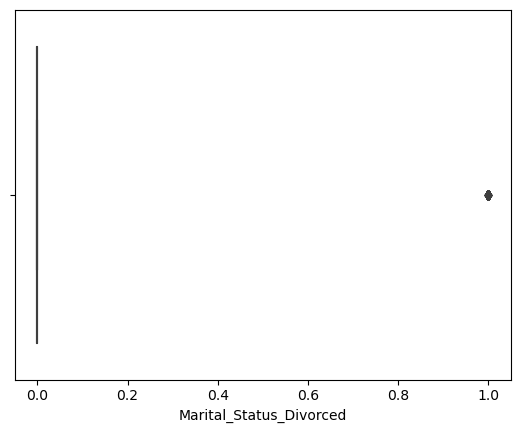

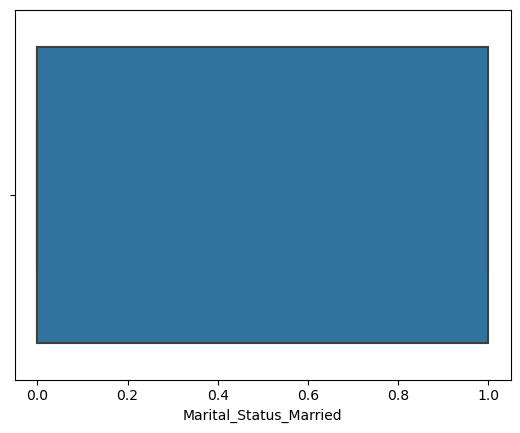

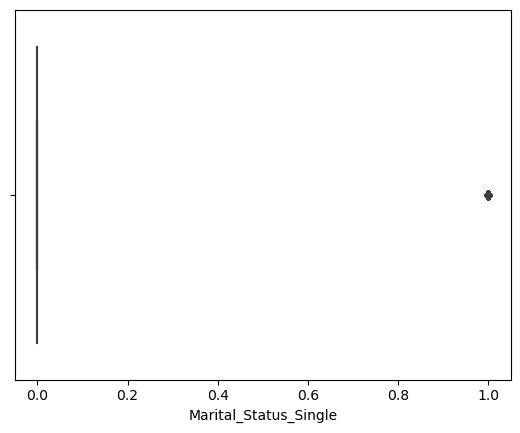

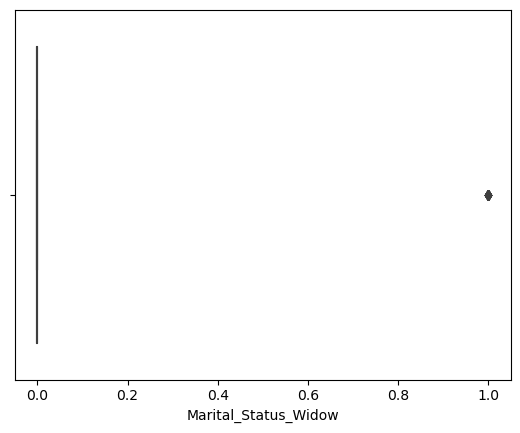

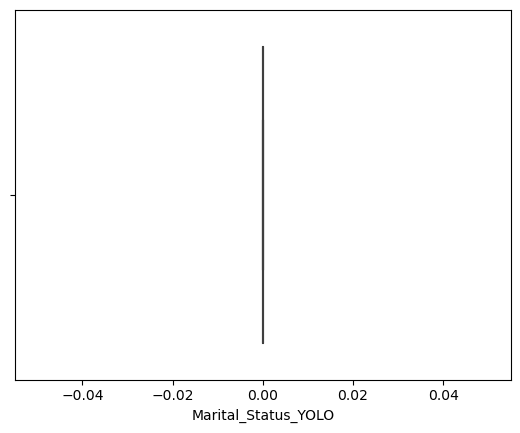

In [33]:
for i in dfr.select_dtypes(include="number").columns: #histogram of all numerical columns
    sns.boxplot(data=dfr,x=i)
    plt.show()

In [34]:
# Function to calculate VIF for each variable
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data
    

In [35]:
vif_result = calculate_vif(dfr)
vif_result

,Variable,VIF
0,ID,4.246034
1,Year_Birth,54294.684251
2,Income,28.989430
3,Kidhome,5.750017
4,Teenhome,4.318247
5,Year_Customer,54769.773777
6,Month_Customer,4.420500
7,Day_Customer,4.633238
8,Recency,4.102022
9,MntWines,14.366495


In [36]:
# Assuming your DataFrame is named 'df'
dfr['Age_at_Enrollment'] = dfr['Year_Customer'] - dfr['Year_Birth']

# Replace Year_Birth with Age_at_Enrollment
dfr['Age'] = dfr['Age_at_Enrollment']

# Drop the original Year_Birth and Age_at_Enrollment columns
dfr = dfr.drop(['Year_Birth', 'Age_at_Enrollment','ID','Marital_Status_Absurd','Marital_Status_YOLO'], axis=1)




In [37]:
dfr.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Year_Customer', 'Month_Customer',
       'Day_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widow', 'Age'],
      dtype='object')

In [38]:

# Move 'Response' column to the last position
dfr1 = dfr[[col for col in dfr.columns if col != 'Response'] + ['Response']]

# Check the updated DataFrame
print(dfr1)


            Income  Kidhome  Teenhome  Year_Customer  Month_Customer  \
1     46344.000000      1.0       1.0           2014               3   
3     26646.000000      1.0       0.0           2014               2   
7     33454.000000      1.0       0.0           2013               5   
8     30351.000000      1.0       0.0           2013               6   
10    52247.251354      1.0       0.0           2013              11   
...            ...      ...       ...            ...             ...   
2229  24434.000000      2.0       0.0           2014               5   
2230  11012.000000      1.0       0.0           2013               3   
2232  26816.000000      0.0       0.0           2012               8   
2234  34421.000000      1.0       0.0           2013               7   
2239  52869.000000      1.0       1.0           2012              10   

      Day_Customer  Recency  MntWines  MntFruits  MntMeatProducts  ...  \
1                8     38.0      11.0        1.0             

In [39]:
X = dfr1.iloc[:,:29] #independent variables
y = dfr1.iloc[:, -1]#dependent variable

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812 entries, 1 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   812 non-null    float64
 1   Kidhome                  812 non-null    float64
 2   Teenhome                 812 non-null    float64
 3   Year_Customer            812 non-null    int32  
 4   Month_Customer           812 non-null    int32  
 5   Day_Customer             812 non-null    int32  
 6   Recency                  812 non-null    float64
 7   MntWines                 812 non-null    float64
 8   MntFruits                812 non-null    float64
 9   MntMeatProducts          812 non-null    float64
 10  MntFishProducts          812 non-null    float64
 11  MntSweetProducts         812 non-null    float64
 12  MntGoldProds             812 non-null    float64
 13  NumDealsPurchases        812 non-null    float64
 14  NumWebPurchases          812 n

In [41]:
dfr.Response.value_counts()

Response
0    753
1     59
Name: count, dtype: int64

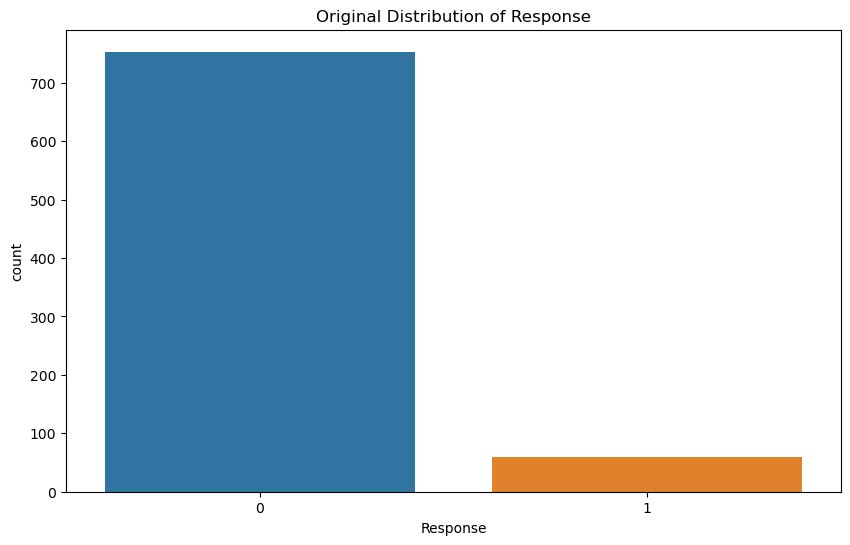

In [42]:
# Plot the distribution of the original target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Response', data=dfr)
plt.title('Original Distribution of Response')
plt.show()

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X, y are your feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






In [44]:
y_test

666     0
1616    0
608     0
811     1
1501    0
       ..
1881    1
1233    0
2091    0
1437    0
2195    0
Name: Response, Length: 163, dtype: int64

In [45]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=42, k_neighbors=1)  # You can adjust k_neighbors as needed
X_train, y_train = smote.fit_resample(X_train, y_train)

In [46]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1209    1
1210    1
1211    1
1212    1
1213    1
Name: Response, Length: 1214, dtype: int64

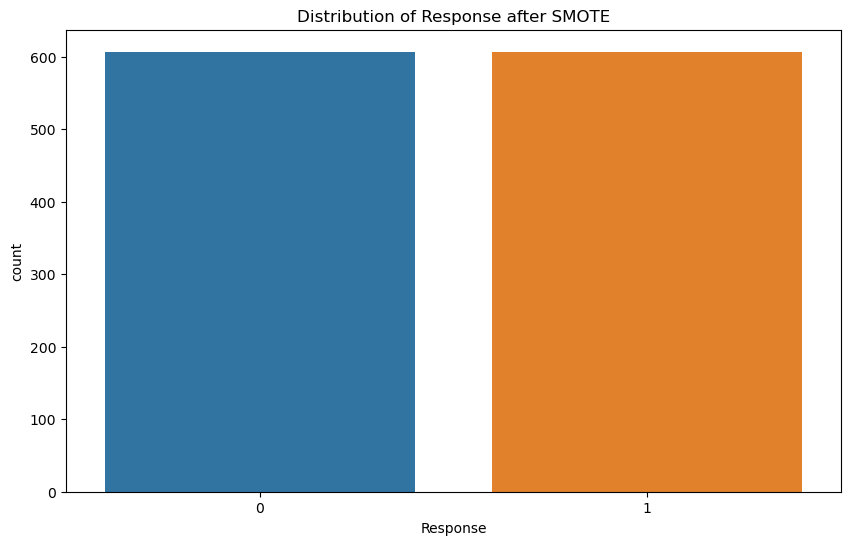

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x= y_train)
plt.title('Distribution of Response after SMOTE')
plt.show()

In [48]:
import statsmodels.api as sm
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the features matrix
#X_train_sm = sm.add_constant(X_train_scaled)
#X_test_sm = sm.add_constant(X_test_scaled)

logreg_sm = sm.Logit(y_train, X_train_scaled)
result = logreg_sm.fit_regularized(method='l1', maxiter=1000)

# Display the summary
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1453740986665569
            Iterations: 109
            Function evaluations: 109
            Gradient evaluations: 109
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1214
Model:                          Logit   Df Residuals:                     1185
Method:                           MLE   Df Model:                           28
Date:                Sun, 10 Mar 2024   Pseudo R-squ.:                  0.7903
Time:                        21:41:50   Log-Likelihood:                -176.48
converged:                       True   LL-Null:                       -841.48
Covariance Type:            nonrobust   LLR p-value:                1.278e-262
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


# Predict the probabilities
y_prob = result.predict(X_test_scaled)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred = (y_prob > 0.5).astype(int)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)



Overall Accuracy: 0.8834
Precision: 0.4667
Recall: 0.8235
Confusion Matrix:
[[130  16]
 [  3  14]]


In [50]:
# Extract the coefficients, variable names, and p-values
coefficients = result.params  # Include all coefficients
variable_names = X_train.columns
p_values = result.pvalues

# Create a DataFrame to display the coefficients with variable names and formatted p-values
coefficients_df = pd.DataFrame({
    'Variable': variable_names,
    'Coefficient': coefficients,
    'P>|z|': p_values.apply(lambda x: '{:.3f}'.format(x))
})

# Filter the DataFrame to only show rows where the p-value is less than 0.05
significant_coefficients = coefficients_df[coefficients_df['P>|z|'].astype(float) < 0.05]

# Display the filtered DataFrame
print(significant_coefficients)




                    Variable  Coefficient  P>|z|
x2                   Kidhome    -0.513924  0.006
x3                  Teenhome    -1.144260  0.000
x4             Year_Customer    -2.092146  0.000
x5            Month_Customer    -0.900300  0.000
x6              Day_Customer     0.353614  0.019
x7                   Recency    -1.734895  0.000
x8                  MntWines    -0.966317  0.028
x10          MntMeatProducts     1.440272  0.000
x11          MntFishProducts    -0.958105  0.000
x13             MntGoldProds     0.678974  0.002
x14        NumDealsPurchases     0.780985  0.004
x15          NumWebPurchases     0.849388  0.006
x16      NumCatalogPurchases     0.530007  0.042
x17        NumStorePurchases    -2.557956  0.000
x20          Education_Basic    -0.941804  0.000
x21     Education_Graduation    -1.343457  0.000
x22         Education_Master    -1.159957  0.000
x23            Education_PhD    -0.778451  0.000
x25  Marital_Status_Divorced    -0.476602  0.002
x26   Marital_Status

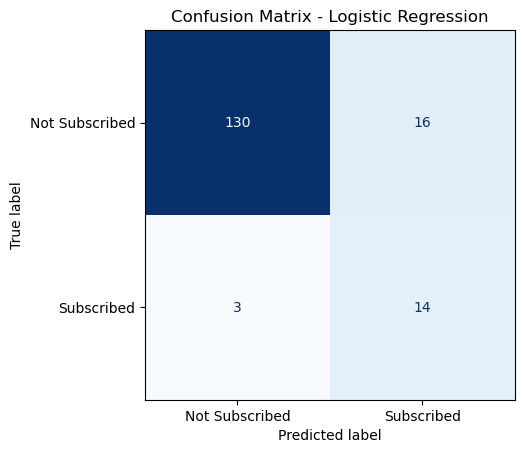

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Display the confusion matrix with reordered labels
disp_logit = ConfusionMatrixDisplay(conf_matrix, display_labels=["Not Subscribed", "Subscribed"])
disp_logit.plot(cmap='Blues', values_format='d', colorbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()



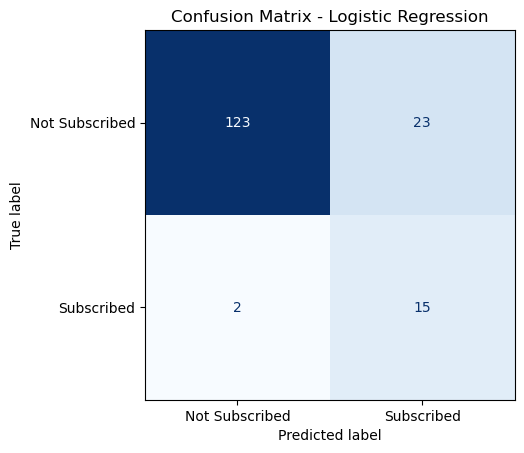

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred = (y_prob > 0.3).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)


# Display the confusion matrix with reordered labels
disp_logit = ConfusionMatrixDisplay(conf_matrix, display_labels=["Not Subscribed", "Subscribed"])
disp_logit.plot(cmap='Blues', values_format='d', colorbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [53]:
# Build the SVM model using scikit-learn
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluate the SVM model performance
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))




Confusion Matrix:
[[141   5]
 [ 12   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       146
           1       0.50      0.29      0.37        17

    accuracy                           0.90       163
   macro avg       0.71      0.63      0.66       163
weighted avg       0.88      0.90      0.88       163



In [54]:
# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy (Linear Kernel):", accuracy_linear)

Accuracy (Linear Kernel): 0.8895705521472392


In [55]:
# SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3)  # You can adjust the degree parameter
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy (Polynomial Kernel):", accuracy_poly)

Accuracy (Polynomial Kernel): 0.8957055214723927


In [56]:

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (RBF Kernel):", accuracy_rbf)

Accuracy (RBF Kernel): 0.8957055214723927


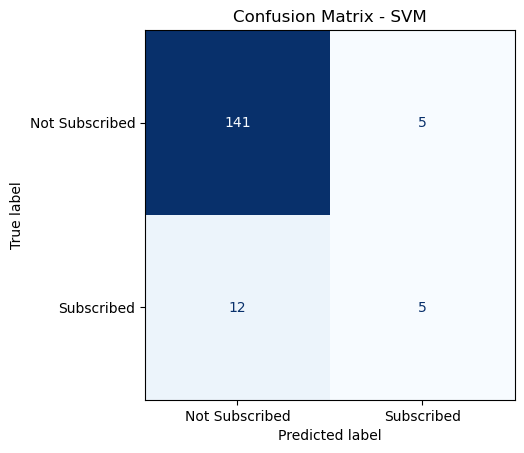

In [57]:


# Display the confusion matrix with reordered labels
disp_logit = ConfusionMatrixDisplay(conf_matrix_svm, display_labels=["Not Subscribed", "Subscribed"])
disp_logit.plot(cmap='Blues', values_format='d', colorbar=False)
plt.title('Confusion Matrix - SVM')
plt.show()

In [61]:
import pandas as pd

# Metrics for Logistic Regression
logistic_metrics = {
    'Overall Accuracy': 0.8834,
    'Precision (Class 1)': 0.4667,
    'Recall (Class 1)': 0.8235,
    # Add more metrics if needed
}

# Metrics for SVM with RBF Kernel
svm_rbf_metrics = {
    'Overall Accuracy': 0.896,
    'Precision (Class 1)': 0.50,  # Replace with actual precision
    'Recall (Class 1)': 0.29,     # Replace with actual recall
    # Add more metrics if needed
}



# Create a DataFrame for the comparison table
comparison_table = pd.DataFrame({
    'Metric': list(logistic_metrics.keys()),
    'Logistic Regression': list(logistic_metrics.values()),
    'SVM (RBF Kernel)': list(svm_rbf_metrics.values()),
    })

# Print the comparison table
comparison_table


,Metric,Logistic Regression,SVM (RBF Kernel)
0,Overall Accuracy,0.8834,0.896
1,Precision (Class 1),0.4667,0.500
2,Recall (Class 1),0.8235,0.290
